In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

dataset = "current.csv"
df = pd.read_csv(dataset)

#display(df.head(50))

#for i in range(0,128):
#    print(i)
#    print(df.columns[i])

UTILITY FUNCTIONS

In [128]:
def autocorrelation(var, group):
    plot_acf(group[var].dropna(),lags=20)
    plt.title(var)
    plt.tight_layout()
    plt.xlabel('lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)

    plt.show()
    
def table(df):
    stats = df.describe(percentiles=[.25, .5, .75])
    stats = stats.transpose()
    selected_columns = ['mean', '25%', '50%', '75%', 'std', 'min', 'max']
    table = stats[selected_columns]
    display(table)
    return table

def heatmap(table):
    plt.figure(figsize=(20, 20))
    mask = np.triu(np.ones_like(table.corr()))
    heatmap = sns.heatmap(table.corr(), mask=mask, annot=True)
    plt.show()

def plot_dataframe(df, title, x_label, y_label):
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

group_1_id = [1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
group_2_id = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,120,121,122]
group_3_id = [48,49,50,51,52,53,54,55,56,57]
group_4_id = [3,4,5,58,59,60,61,62,63,123]
group_5_id = [64,65,66,67,68,69,70,71,72,73,124,125,126]
group_6_id = [78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
group_7_id = [104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119]
group_8_id = [74,75,76,77]

In [108]:
#print(df.columns[70])
#for i in range(0,127):
#    print(i)
#    print(df.columns[i])



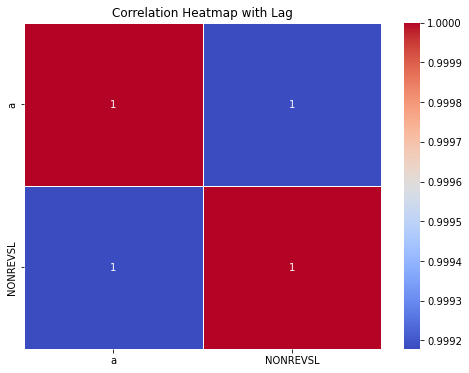

In [126]:
df['a'] = df['NONREVSL'].shift(15)

correlation_matrix = df[['a', 'NONREVSL']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Lag')
plt.show()

GROUP 1 - Output and Income

mean         25%        50%          75%          std  min   
RPI        8832.440348  4818.12100  7789.7860  12837.64300  4629.722513  5.0  \
W875RX1    7544.798323  4286.90000  6800.3000  10748.25000  3685.060156  5.0   
INDPRO       66.792490    44.58135    62.1789     93.64265    26.688838  5.0   
IPFPNSS      71.177096    46.87740    70.9207     98.99050    27.227744  5.0   
IPFINAL      69.944770    44.68460    69.2094     98.02165    27.485688  5.0   
IPCONGD      78.616577    61.11195    80.2784    100.26205    23.546880  5.0   
IPDCONGD     65.880871    41.72515    60.0130     95.65360    28.442026  5.0   
IPNCONGD     83.971185    67.97200    90.0488    101.65750    21.301569  5.0   
IPBUSEQ      52.302973    19.99415    42.1618     86.37255    33.476258  5.0   
IPMAT        62.030360    41.04595    53.1778     88.16955    26.878868  5.0   
IPDMAT       51.230272    23.26725    33.8208     87.22365    32.483623  5.0   
IPNMAT       86.433453    74.54065    97.6732    102.12090    23.195430  5.0   
IPMANSICS    66.793671    42.70050    62.1043     96.60120    28.039296  5.0   
IPB51222S    73.489293    54.10070    74.9437     98.66085    26.944487  5.0   
IPFUELS      67.629825    58.09425    65.9059     82.97325    18.079753  5.0   
CUMFNS       79.246836    76.15130    79.0341     82.71230     5.743538  2.0   

                  max  
RPI        21448.0630  
W875RX1    14754.4000  
INDPRO       104.1181  
IPFPNSS      110.2219  
IPFINAL      108.6777  
IPCONGD      111.7850  
IPDCONGD     110.1288  
IPNCONGD     113.9125  
IPBUSEQ      105.6015  
IPMAT        106.7112  
IPDMAT       104.3391  
IPNMAT       116.0417  
IPMANSICS    108.3983  
IPB51222S    117.7027  
IPFUELS      103.1450  
CUMFNS        91.6379

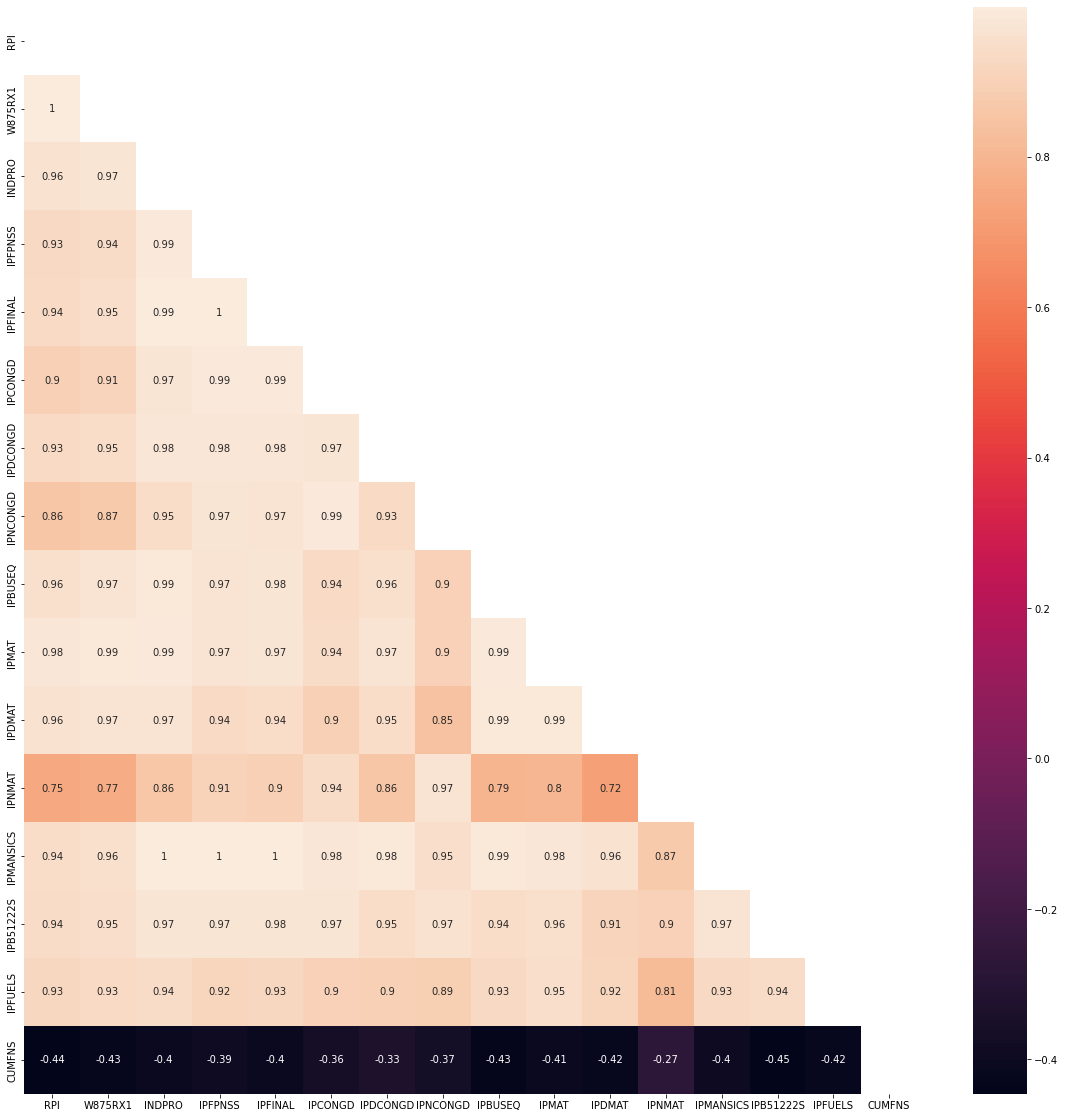

In [129]:
group_1 = df.iloc[:, group_1_id]
table(group_1)
heatmap(group_1)

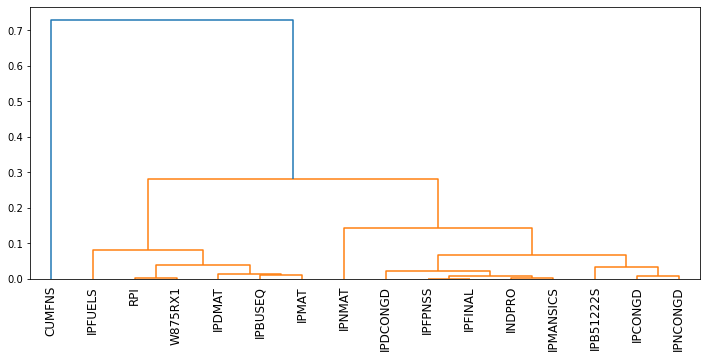

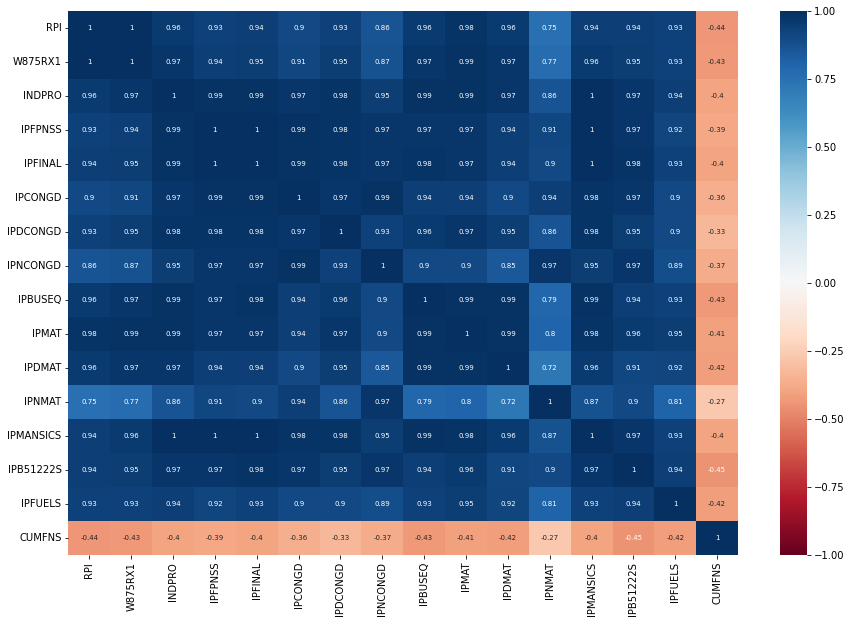

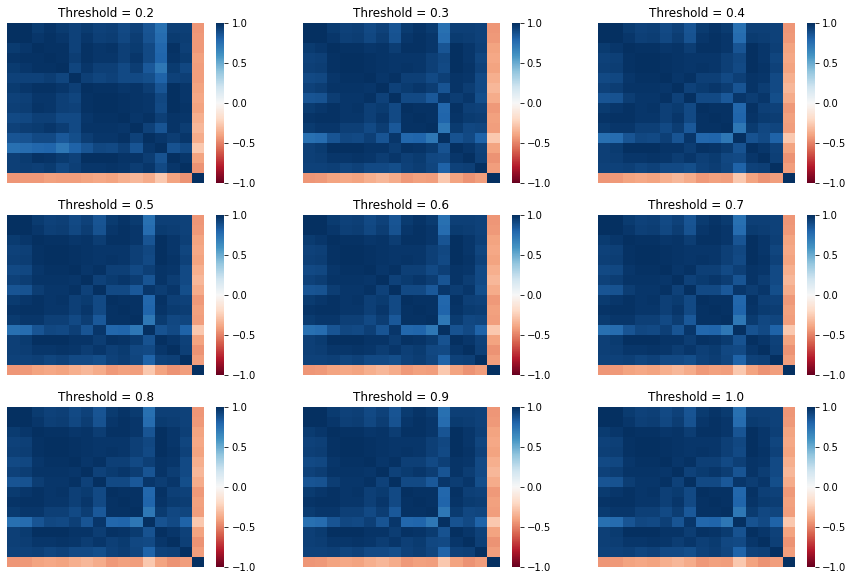

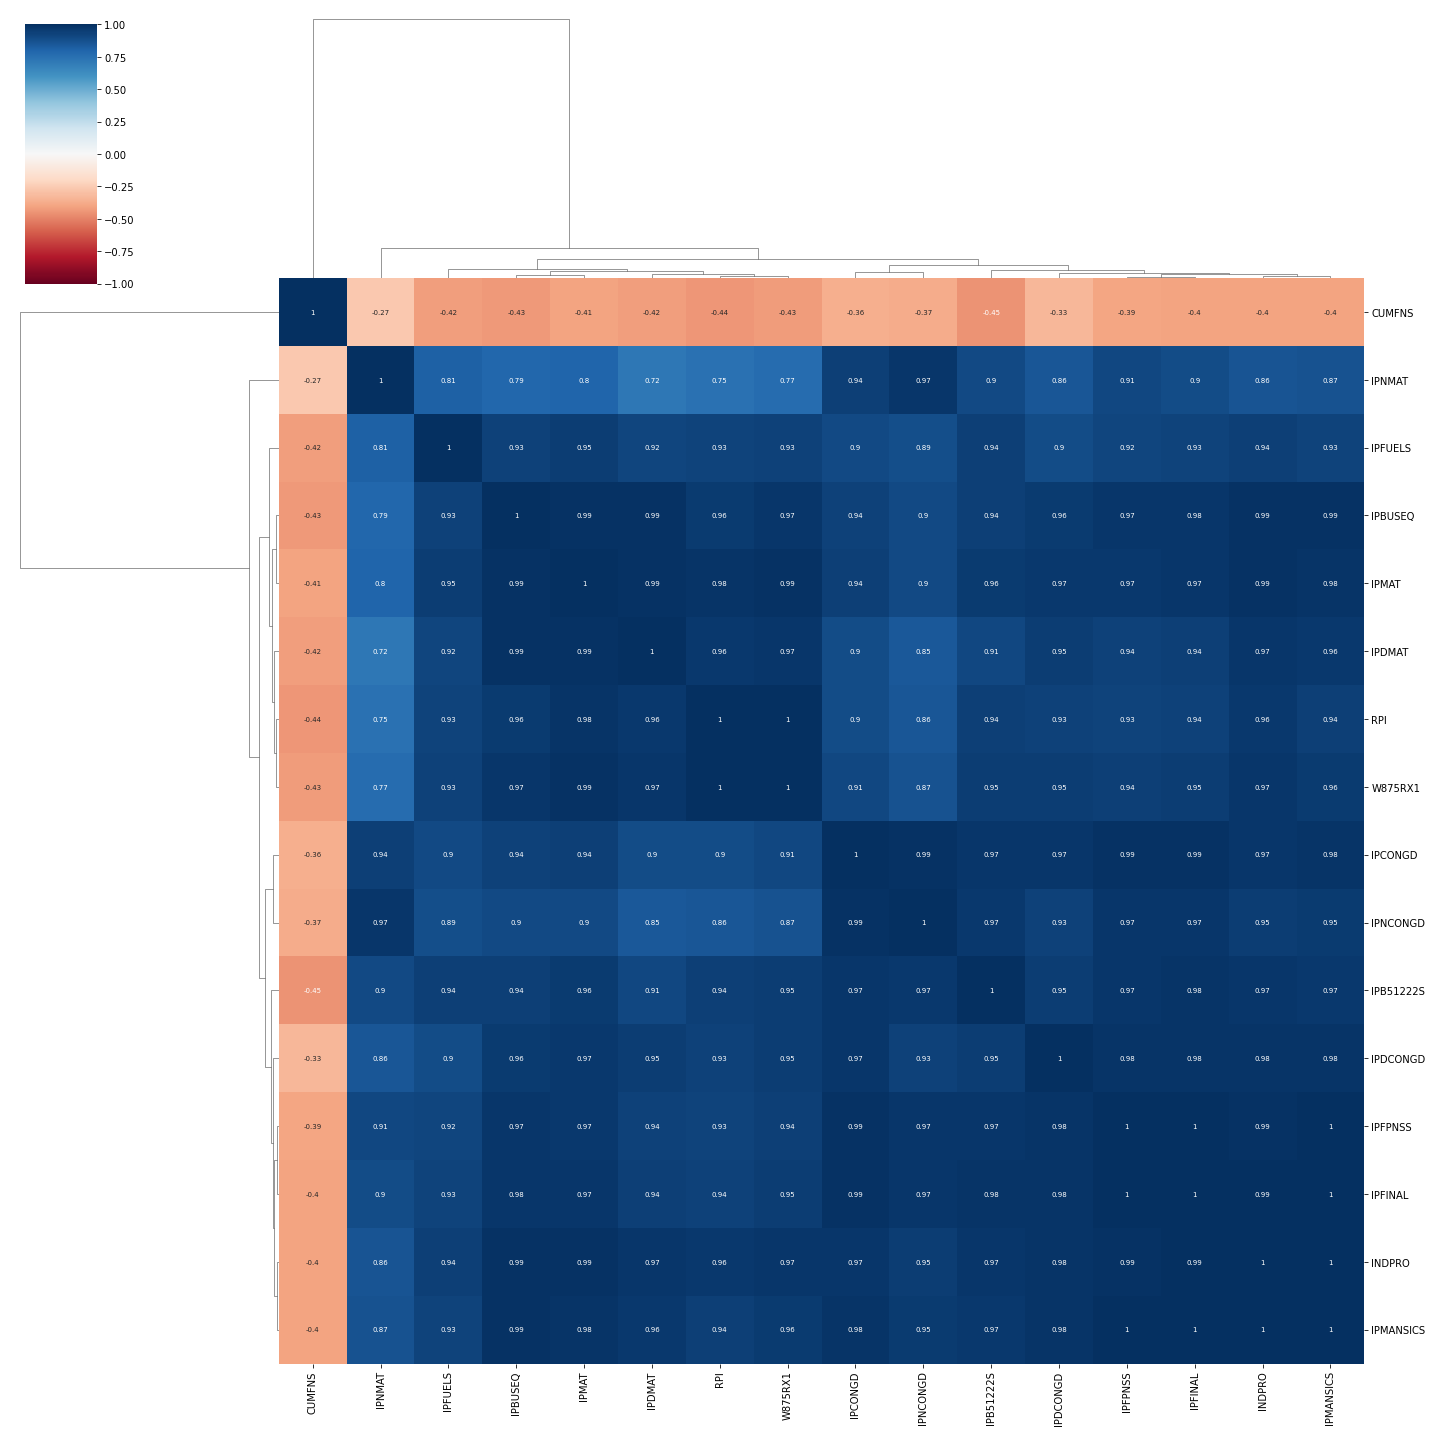

In [144]:



plt.figure(figsize=(12,5))
correlations = group_1.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=group_1.columns, orientation='top', 
           leaf_rotation=90);

# Clusterize the data
threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(group_1.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(group_1[i])
    else:
        df_to_append = pd.DataFrame(group_1[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.figure(figsize=(15,10))



for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(group_1.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(group_1[i])
        else:
            df_to_append = pd.DataFrame(group_1[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(20,20));

IPMAT has the lowest correlation with most variables.
CUMFNS (Capacity Utilization: Manufacturing) has no correlation.

GROUP 2 - Labor Market

mean            25%            50%            75%   
HWI              4093.465116    3041.000000    3878.000000    4726.250000  \
HWIURATIO           0.640192       0.410763       0.555033       0.777776   
CLF16OV        121477.007742   92954.000000  126150.000000  153012.000000   
CE16OV         114254.736774   86590.500000  118144.000000  140154.000000   
UNRATE              5.921548       4.800000       5.600000       7.000000   
UEMPMEAN           17.361806      12.600000      15.400000      19.500000   
UEMPLT5          2611.361290    2212.500000    2621.000000    3043.000000   
UEMP5TO14        2112.932903    1638.000000    2151.000000    2525.500000   
UEMP15OV         2498.645161    1291.000000    2168.000000    2969.500000   
UEMP15T26        1035.569032     680.000000     986.000000    1260.500000   
UEMP27OV         1463.070968     622.500000    1164.000000    1699.000000   
CLAIMSx        356208.158710  282790.500000  333600.000000  391975.000000   
PAYEMS         105950.980645   78065.500000  108731.000000  132595.000000   
USGOOD          21798.978065   20217.500000   22127.000000   23376.000000   
CES1021000001     672.490839     585.650000     636.300000     716.250000   
USCONS           5192.241290    3939.500000    5095.000000    6681.000000   
MANEMP          15861.700645   13920.000000   16862.000000   17723.500000   
DMANEMP          9723.014194    8700.000000   10161.000000   10877.500000   
NDMANEMP         6138.692903    5082.000000    6648.000000    6914.500000   
SRVPRD          84152.009032   55390.000000   85942.000000  112800.000000   
USTPU           20827.823226   15631.500000   22258.000000   25655.500000   
USWTRADE         4746.085677    3794.250000    5140.100000    5681.650000   
USTRADE         11836.011742    8569.850000   12962.000000   15044.900000   
USFIRE           6083.249032    4034.500000    6580.000000    7936.500000   
USGOVT          17515.358710   14685.500000   18543.000000   21850.000000   
CES0600000007      40.242839      39.900000      40.300000      40.800000   
AWOTMAN             3.742065       3.200000       3.800000       4.300000   
AWHMAN             40.728903      40.400000      40.700000      41.300000   
CES0600000008      12.318826       5.005000      11.660000      18.605000   
CES2000000008      14.304877       6.585000      13.630000      20.845000   
CES3000000008      11.381884       4.605000      11.000000      17.215000   

                         std       min           max  
HWI              1780.157216  2.000000  1.202700e+04  
HWIURATIO           0.334187  0.152866  2.013898e+00  
CLF16OV         31449.170709  5.000000  1.669510e+05  
CE16OV          29727.254549  5.000000  1.610310e+05  
UNRATE              1.681972  2.000000  1.470000e+01  
UEMPMEAN            7.356767  2.000000  4.070000e+01  
UEMPLT5           735.738853  5.000000  1.423200e+04  
UEMP5TO14         906.123146  5.000000  1.480600e+04  
UEMP15OV         1830.214710  5.000000  9.130000e+03  
UEMP15T26         598.995251  5.000000  6.580000e+03  
UEMP27OV         1341.576672  5.000000  6.800000e+03  
CLAIMSx        216012.294308  5.000000  4.663250e+06  
PAYEMS          30851.923745  5.000000  1.562040e+05  
USGOOD           2056.383761  5.000000  2.516300e+04  
CES1021000001     137.950834  5.000000  1.177400e+03  
USCONS           1494.867230  5.000000  7.947000e+03  
MANEMP           2410.727079  5.000000  1.955300e+04  
DMANEMP          1447.064214  5.000000  1.232000e+04  
NDMANEMP          999.520042  5.000000  7.233000e+03  
SRVPRD          30924.353506  5.000000  1.346260e+05  
USTPU            5597.048878  5.000000  2.889500e+04  
USWTRADE         1101.552314  5.000000  6.050600e+03  
USTRADE          3515.781234  5.000000  1.587680e+04  
USFIRE           2102.172315  5.000000  9.144000e+03  
USGOVT           4478.995132  5.000000  2.299600e+04  
CES0600000007       1.551534  1.000000  4.160000e+01  
AWOTMAN             0.719737  2.000000  5.200000e+00  
AWHMAN             

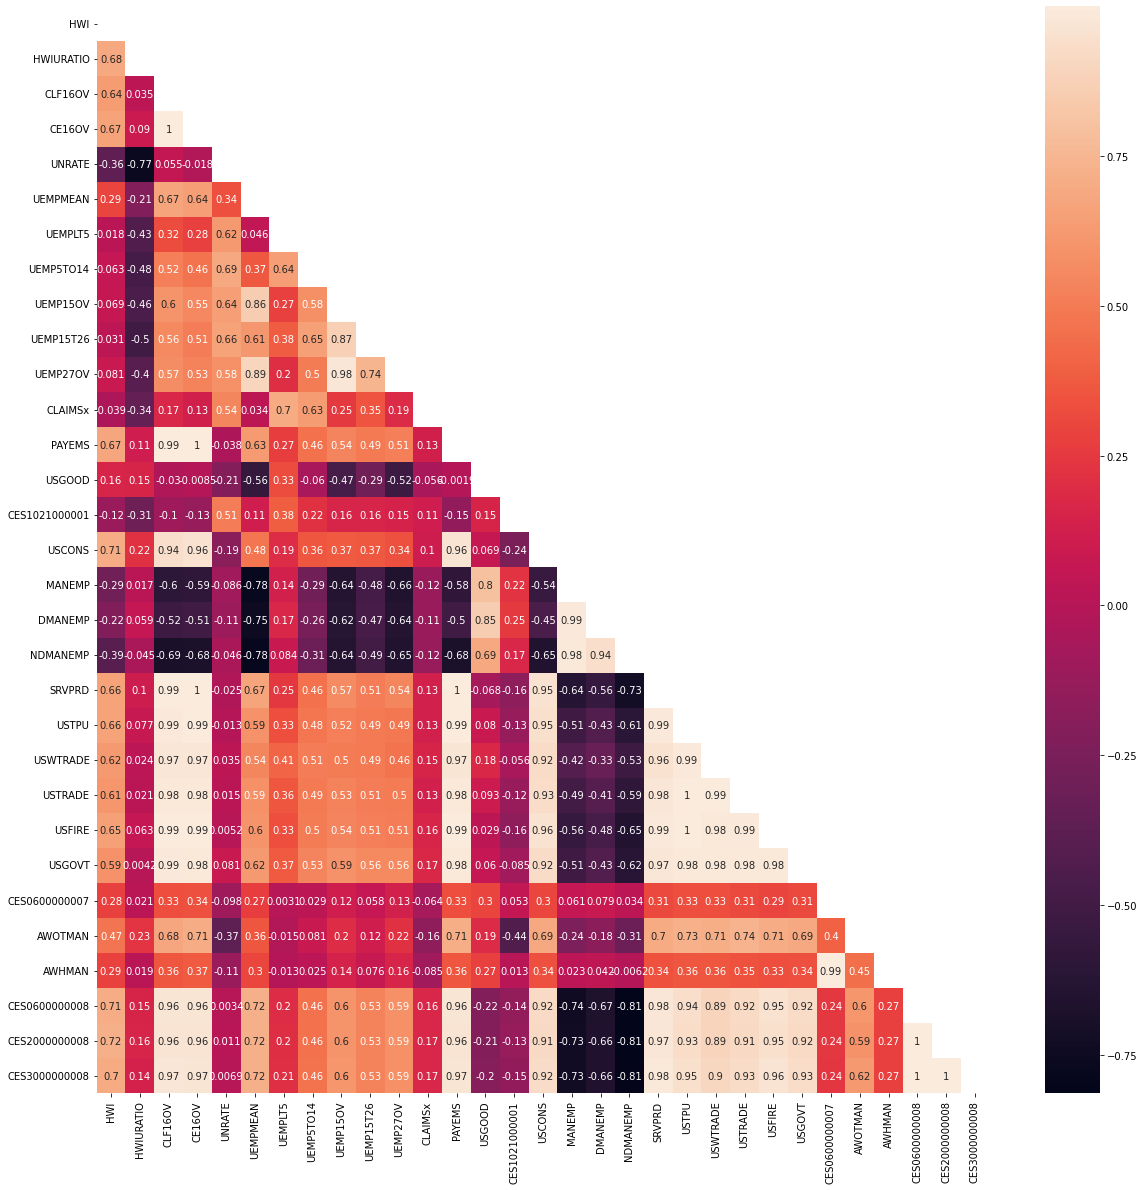

In [7]:
group_2 = df.iloc[:, group_2_id]
table(group_2)
heatmap(group_2)

UNRATE (Civilian Unemployment Rate) - No correlation

MANEMP (All employess: Manufacturing)
DMANEMP (All Employess: Durable Goods)
NDMANEMP (All Employess: Non Durable Goods)
-No correlation




HIGH CORRELATION:
SRVPRD (All Employess: Service-Providing Industries)
USTPU (All Employees: Trade, Transportation & Utilities)
USWTRADE (All Employees: Wholesale Trade)
USTRADE (All Employees: Retail Trade)
USGOVT: (All Employees: Government)

GROUP 3 - Housing

mean     25%     50%     75%         std  min     max
HOUST     1431.527742  1197.0  1459.0  1652.5  387.087537  4.0  2494.0
HOUSTNE    170.978065   123.0   157.0   219.5   67.870893  4.0   395.0
HOUSTMW    275.914839   203.0   283.0   345.5   99.303598  4.0   590.0
HOUSTS     639.352258   512.0   624.0   768.0  183.039620  4.0  1187.0
HOUSTW     345.305806   272.0   346.0   420.0  110.146077  4.0   645.0
PERMIT    1368.174312  1118.0  1349.0  1651.0  384.101774  4.0  2419.0
PERMITNE   171.765400   126.0   163.0   211.0   63.703577  4.0   426.0
PERMITMW   258.184797   193.5   256.0   319.5   86.431219  4.0   507.0
PERMITS    587.027523   422.0   576.0   730.5  200.283377  4.0  1104.0
PERMITW    351.213630   275.0   349.0   421.0  113.826030  4.0   759.0

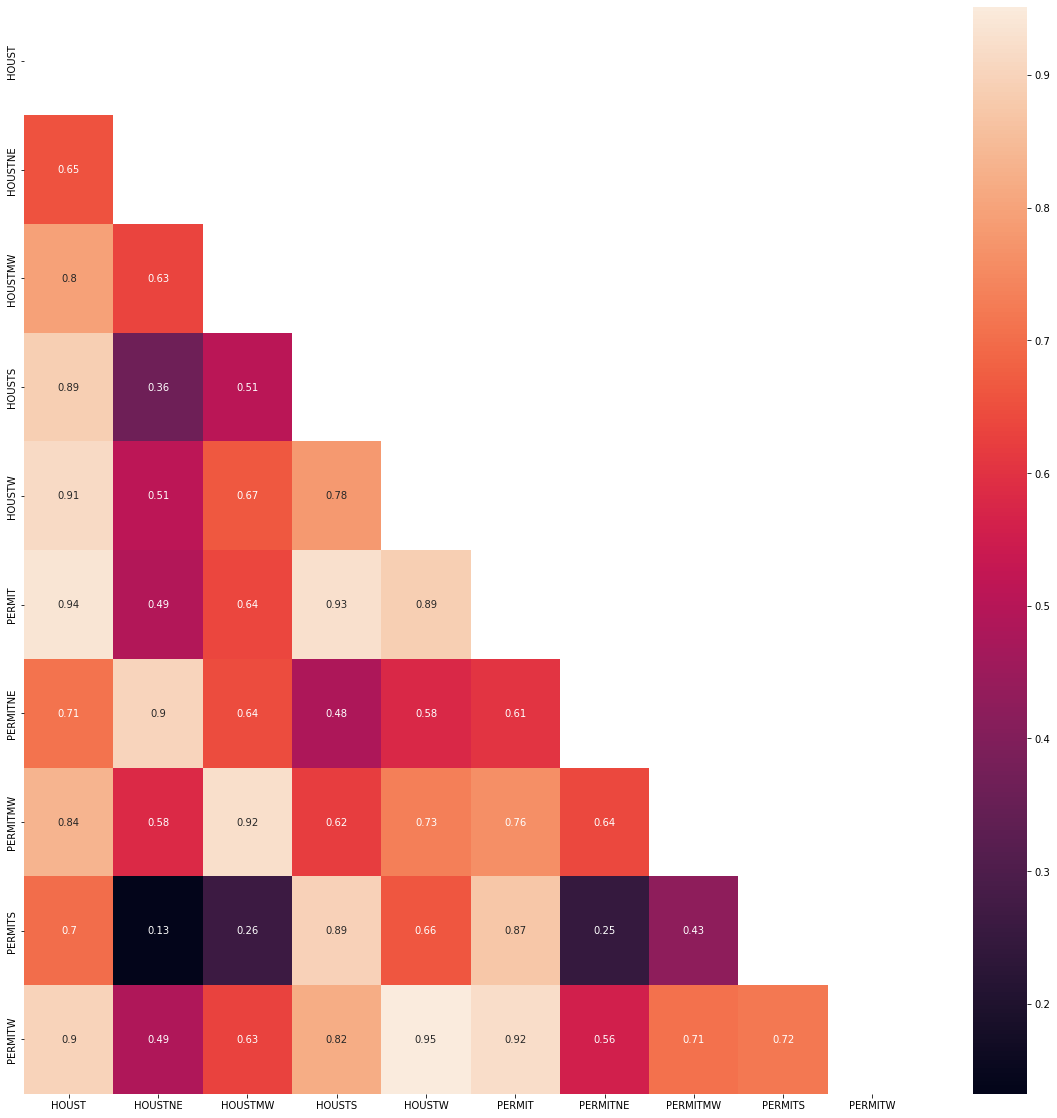

In [90]:
group_3 = df.iloc[:, group_3_id]
table(group_3)
heatmap(group_3)

GROUP 4 - Consumption, orders and inventories

mean            25%            50%          75%   
DPCERA3M086SBEA      62.558036      32.486000      54.668000       95.087  \
CMRMTSPLx        853561.271011  512414.595500  754807.348500  1222318.250   
RETAILx          212012.197693   48335.742555  161003.329500   350177.500   
ACOGNO           159570.400531  120737.000000  165064.000000   197141.000   
AMDMNOx          125748.780051   42534.557760  119791.625800   196368.500   
ANDENOx           45927.674443   24664.536135   49144.000000    66815.000   
AMDMUOx          496289.187332  156563.602850  438096.000000   828732.000   
BUSINVx          889163.517248  277077.124050  809140.834900  1357187.000   
ISRATIOx              1.472653       1.380000       1.487682        1.560   
UMCSENTx             85.414654      75.700000      89.300000       94.900   

                           std   min          max  
DPCERA3M086SBEA      33.276299  5.00      130.878  
CMRMTSPLx        398338.927001  5.00  1585920.000  
RETAILx          177092.835860  5.00   692501.000  
ACOGNO            44223.996422  5.00   262384.000  
AMDMNOx           80684.982112  5.00   302489.000  
ANDENOx           24919.185086  5.00   136828.000  
AMDMUOx          382415.593715  5.00  1325307.000  
BUSINVx          650914.752948  5.00  2545835.000  
ISRATIOx              0.122823  1.24        2.000  
UMCSENTx             13.382948  2.00      112.000

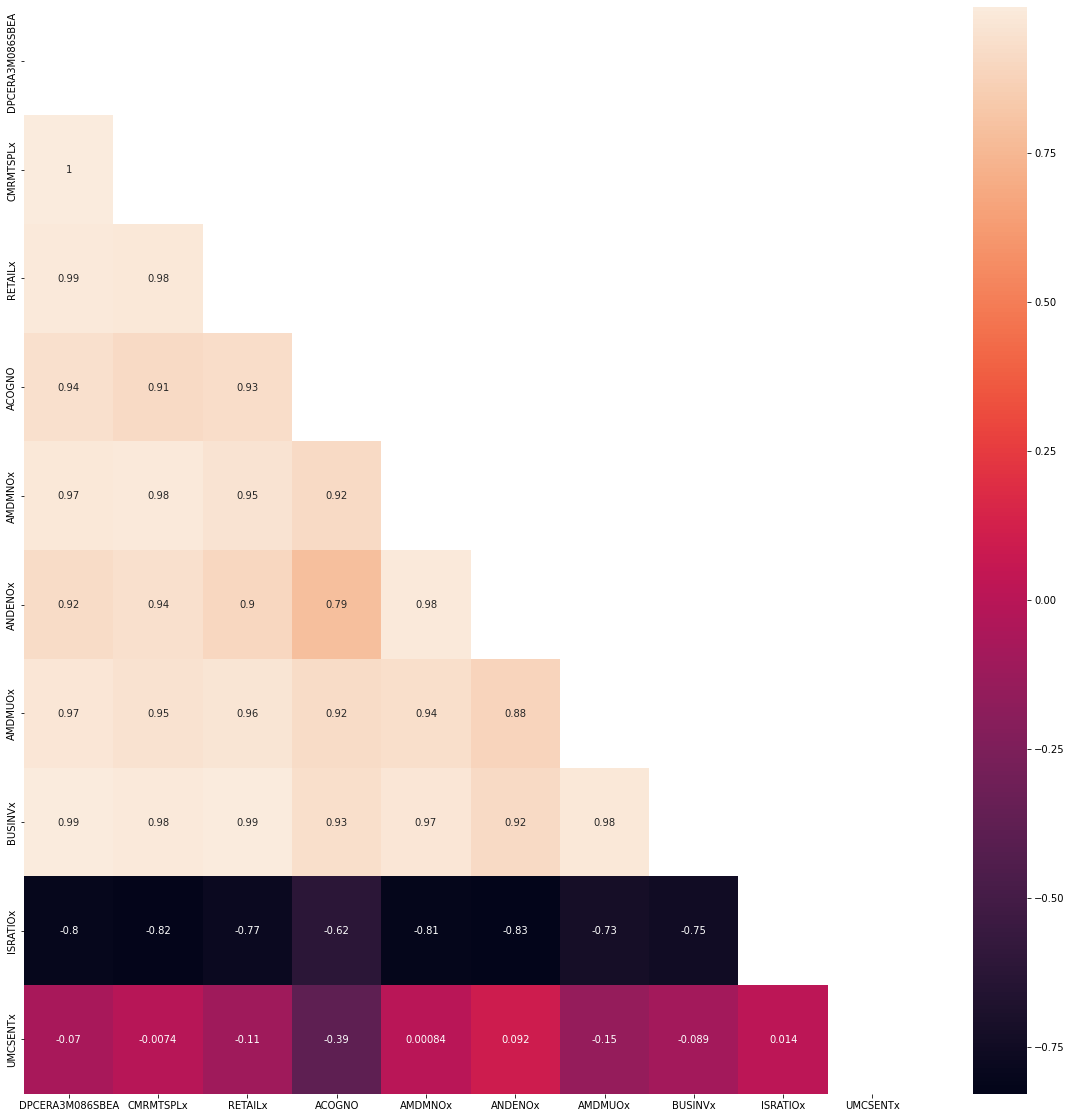

In [91]:
group_4 = df.iloc[:, group_4_id]
table(group_4)
heatmap(group_4)

GROUP 5 - Money and Credit

mean            25%            50%            75%   
M1SL         1.933285e+03     274.600000     838.700000    1378.200000  \
M2SL         5.059444e+03     910.200000    3321.900000    7238.350000   
M2REAL       2.892351e+03    1841.300000    2416.200000    3508.150000   
BOGMBASE     1.059783e+06  106850.000000  314100.000000  826200.000000   
TOTRESNS     5.357765e+02      34.600000      44.000000      61.900000   
NONBORRES    5.192168e+05   33300.000000   42800.000000   60250.000000   
BUSLOANS     8.095802e+02     181.608800     606.269200    1188.449550   
REALLN       1.528479e+03     130.328750     857.412900    3416.329000   
NONREVSL     9.705294e+02     185.627895     546.986805    1550.749845   
CONSPI       1.371148e-01       0.123196       0.134045       0.149932   
DTCOLNVHFNM  1.271717e+05   10740.750000   78250.500000  262427.507500   
DTCTHFNM     3.352309e+05   33730.000000  187087.545000  724741.180000   
INVEST       1.247126e+03     172.155850     640.140600    2024.097600   

                      std            min           max  
M1SL         4.036374e+03       6.000000  2.066420e+04  
M2SL         5.316835e+03       6.000000  2.170360e+04  
M2REAL       1.584013e+03       5.000000  7.671800e+03  
BOGMBASE     1.556227e+06       6.000000  6.413100e+06  
TOTRESNS     1.000956e+03       6.000000  4.193200e+03  
NONBORRES    9.904351e+05 -333500.000000  4.149900e+06  
BUSLOANS     7.440932e+02       6.000000  3.035875e+03  
REALLN       1.643283e+03       6.000000  5.454967e+03  
NONREVSL     9.840997e+02       6.000000  3.612659e+03  
CONSPI       6.952316e-02       0.092865  2.000000e+00  
DTCOLNVHFNM  1.235636e+05       6.000000  3.953937e+05  
DTCTHFNM     3.230182e+05       6.000000  8.969851e+05  
INVEST       1.382891e+03       6.000000  5.836412e+03

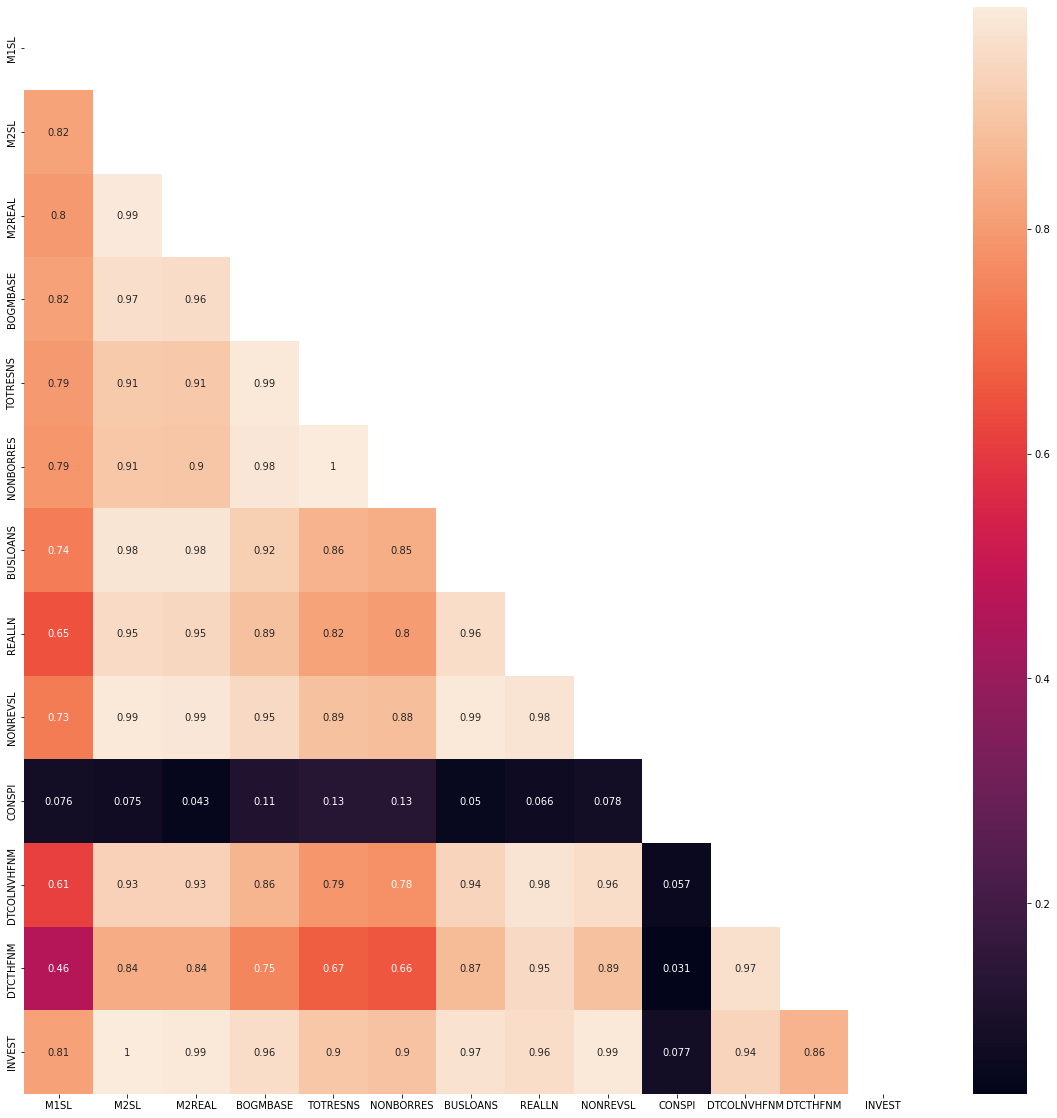

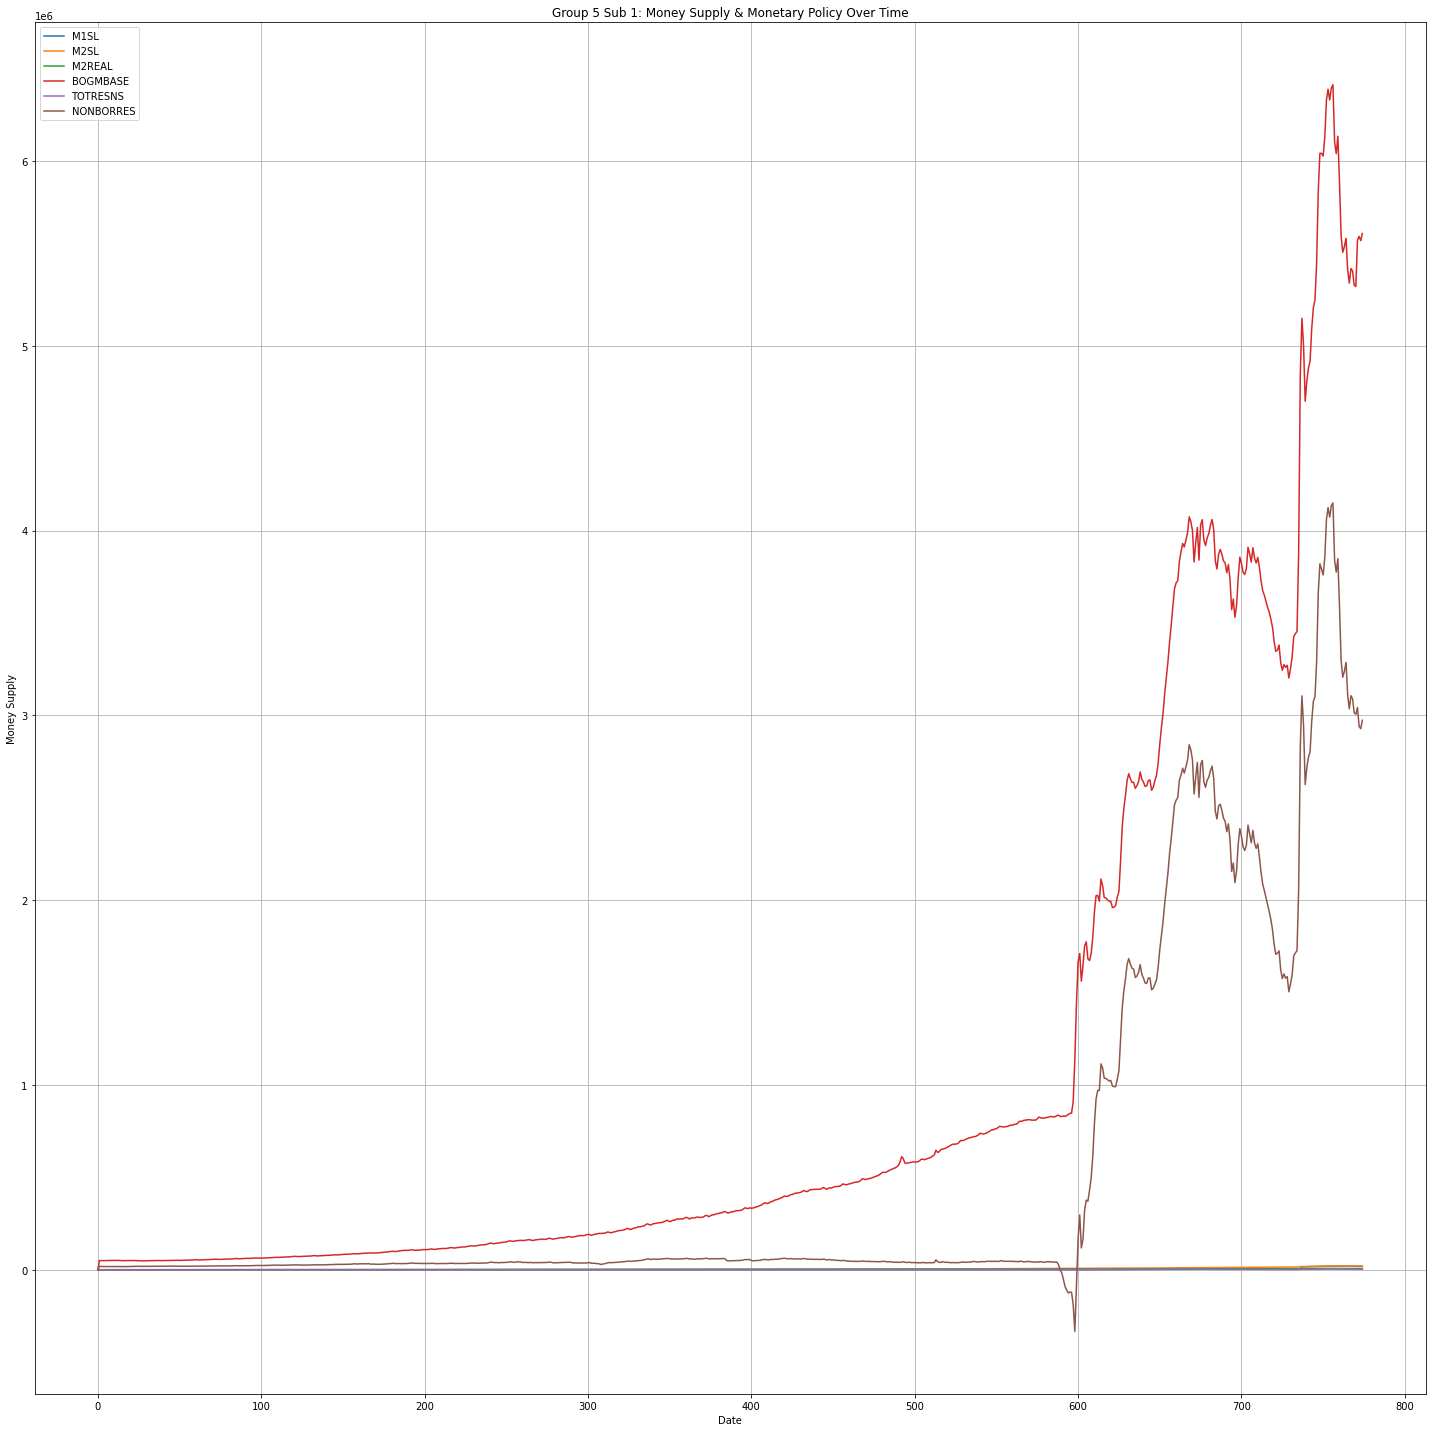

<Figure size 432x288 with 0 Axes>

In [145]:
group_5 = df.iloc[:, group_5_id]
table(group_5)
heatmap(group_5)

group5sub1 = group_5.iloc[:, [0,1,2,3,4,5]]


#Plotting 


plt.figure(figsize=(20, 20))
plot_dataframe(
    group5sub1,
    'Group 5 Sub 1: Money Supply & Monetary Policy Over Time',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()






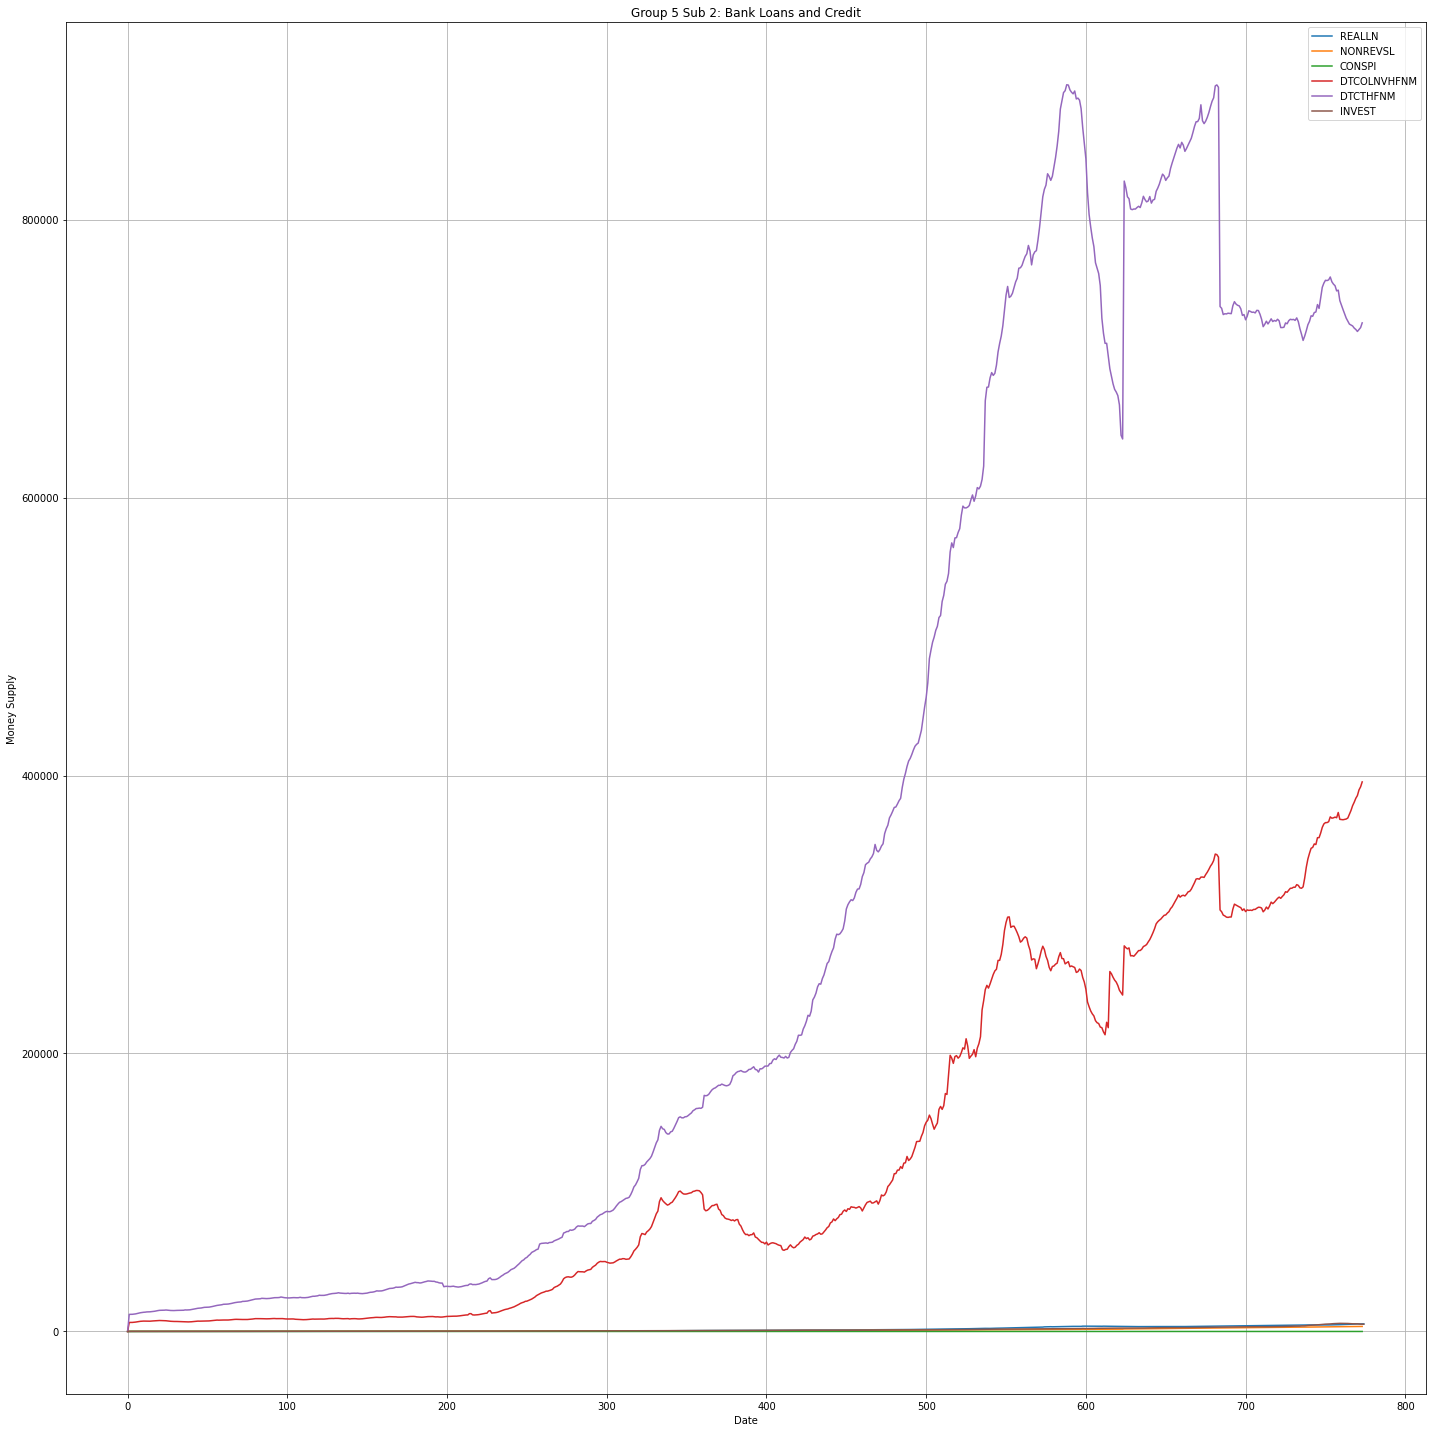

<Figure size 432x288 with 0 Axes>

In [76]:
group5sub2 = group5.iloc[:, [6,7,8,9,10,11]]

plt.figure(figsize=(20, 20))
plot_dataframe(
    group5sub2,
    'Group 5 Sub 2: Bank Loans and Credit',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()

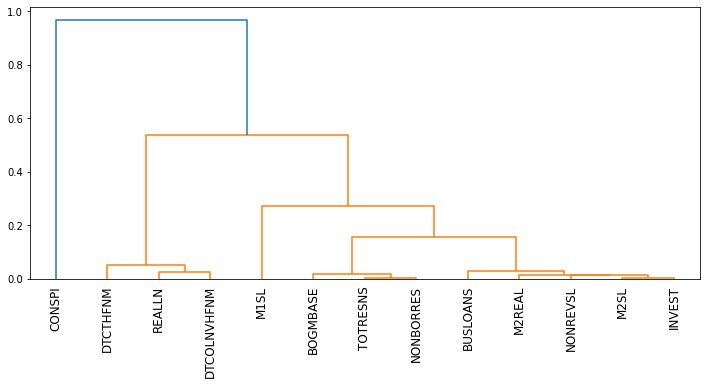

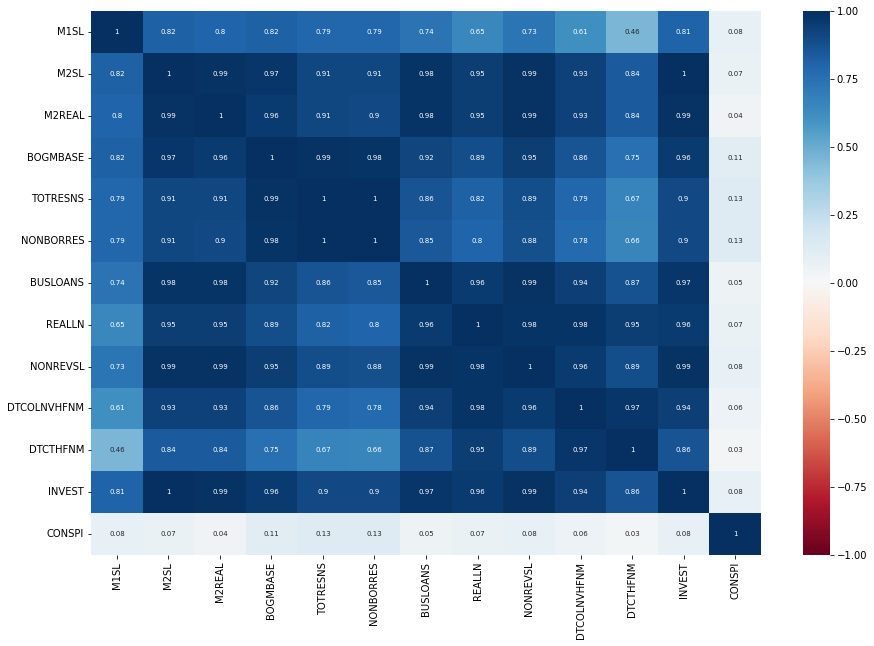

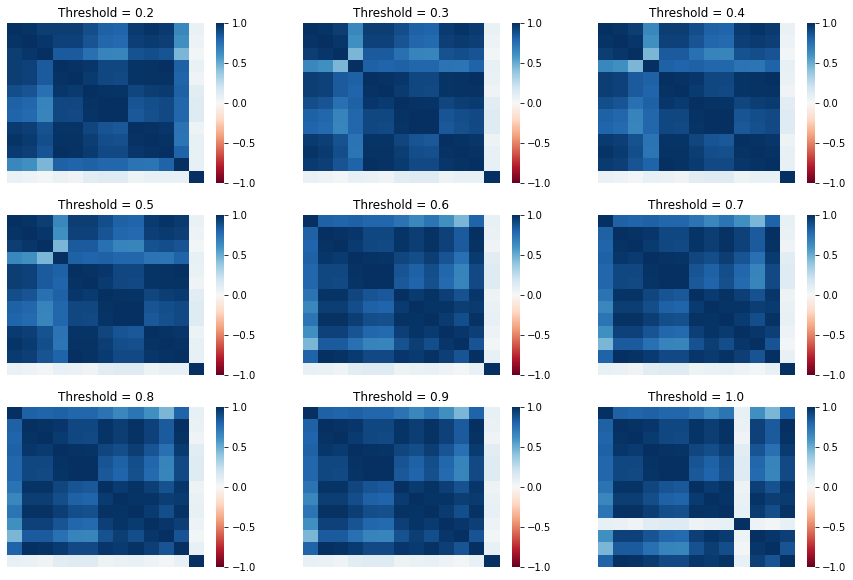

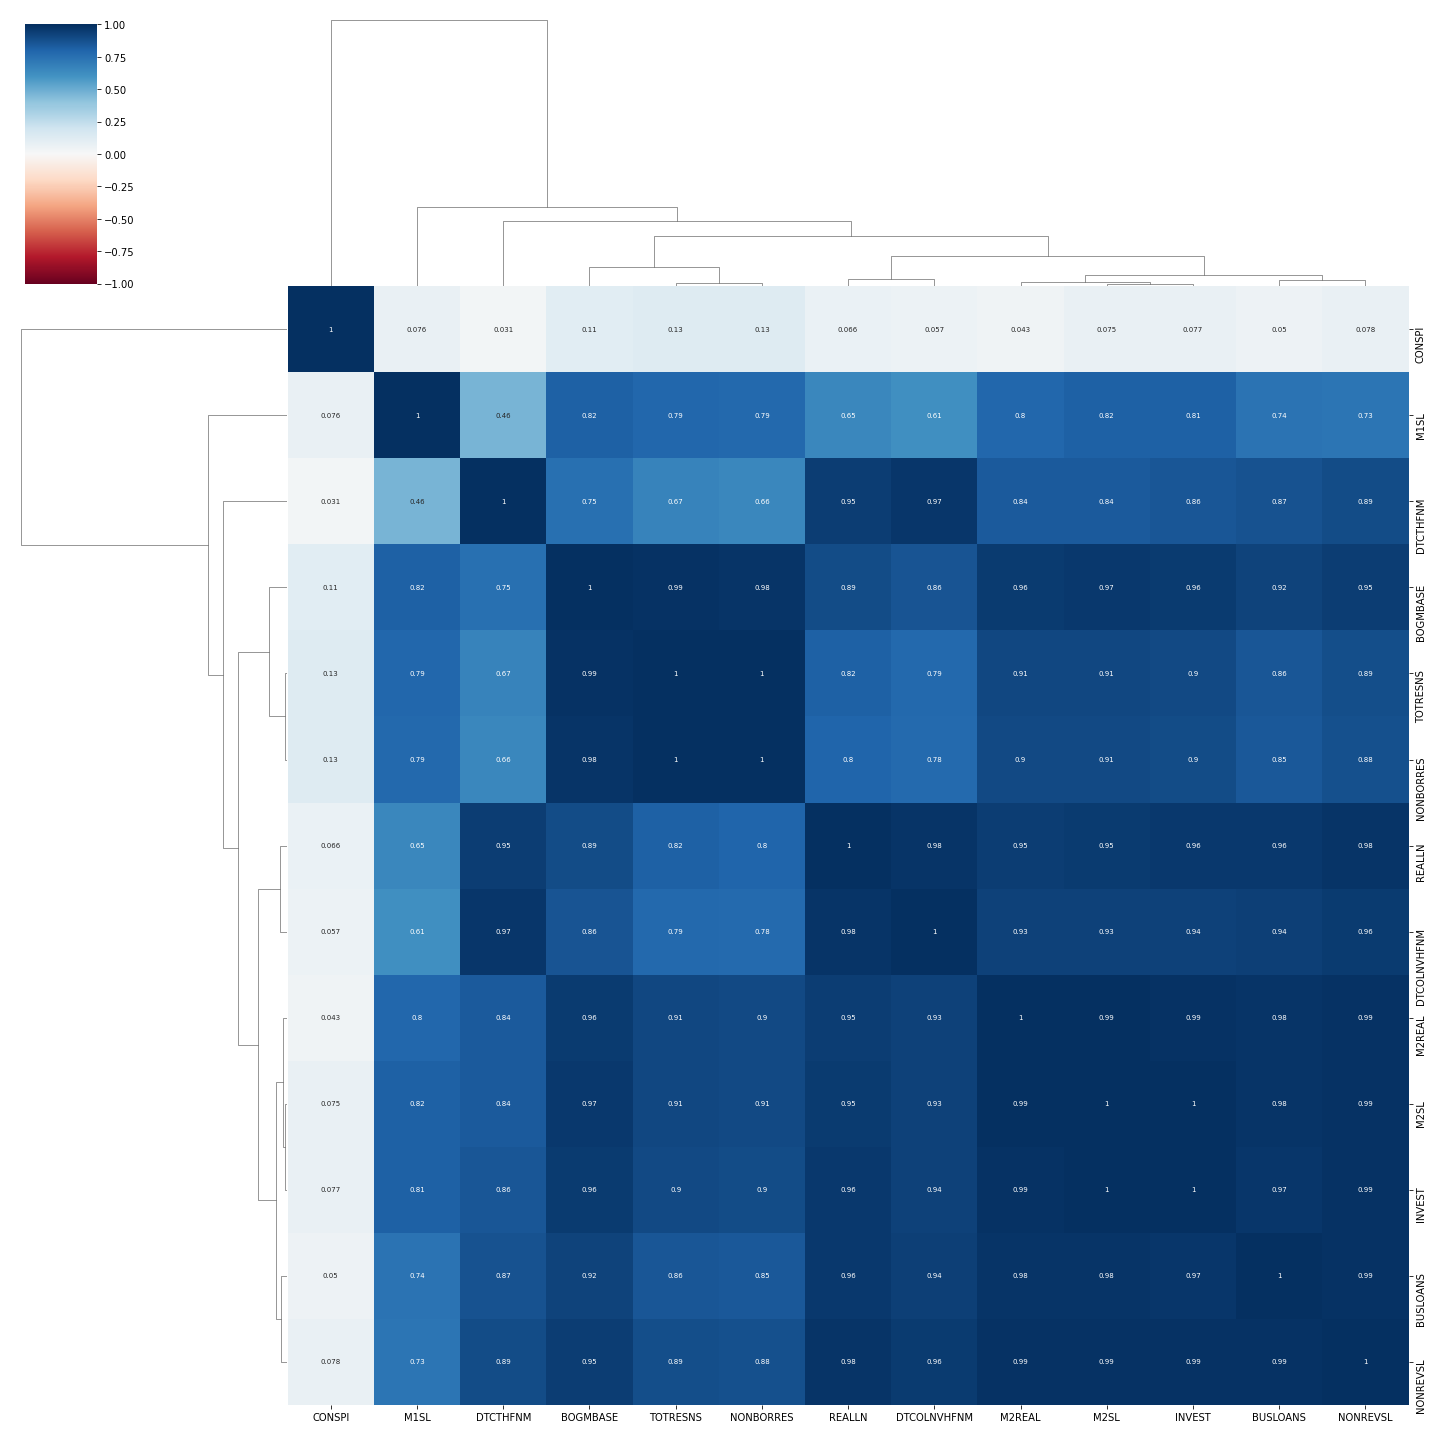

In [146]:



plt.figure(figsize=(12,5))
correlations = group_5.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=group_5.columns, orientation='top', 
           leaf_rotation=90);

# Clusterize the data
threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(group_5.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(group_5[i])
    else:
        df_to_append = pd.DataFrame(group_5[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.figure(figsize=(15,10))



for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(group_5.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(group_5[i])
        else:
            df_to_append = pd.DataFrame(group_5[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(20,20));

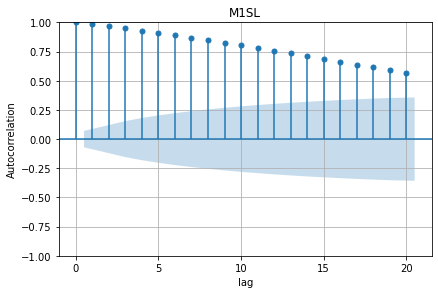

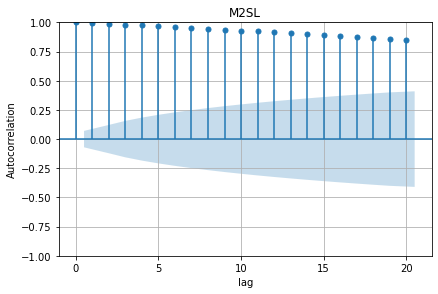

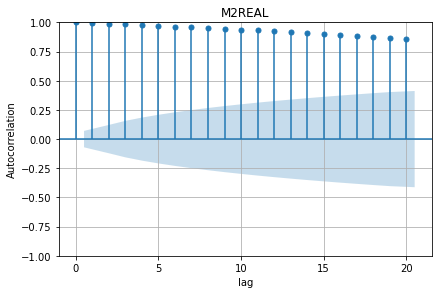

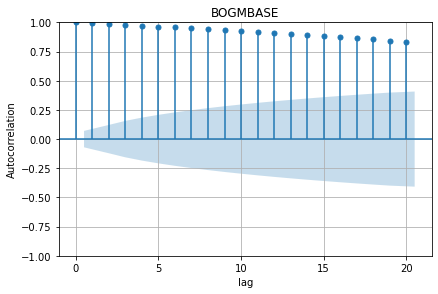

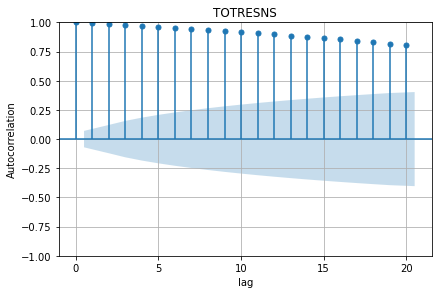

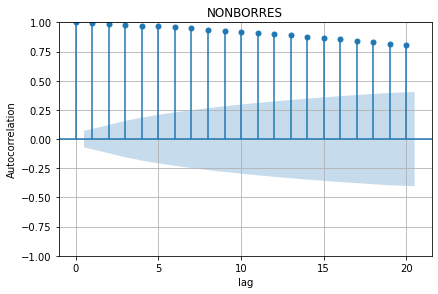

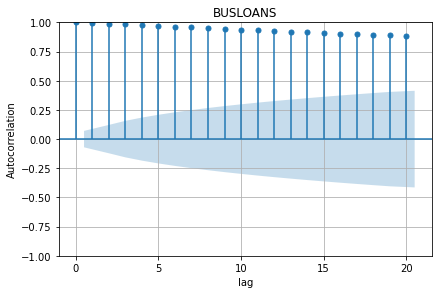

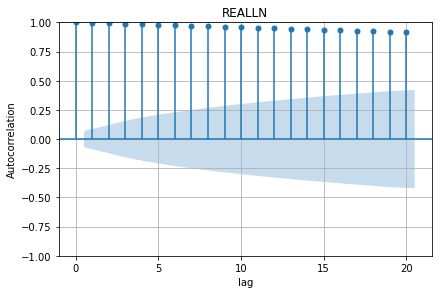

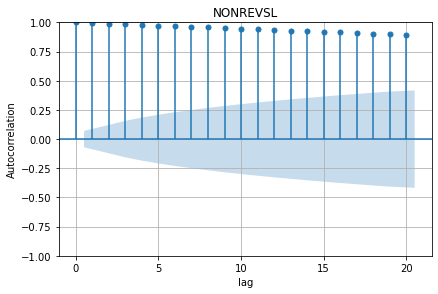

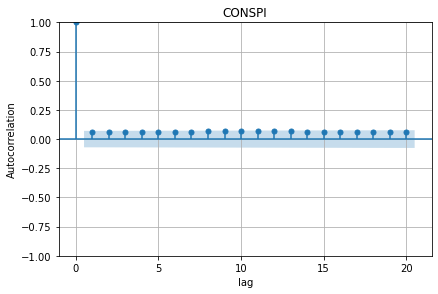

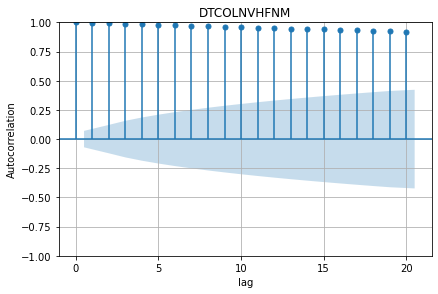

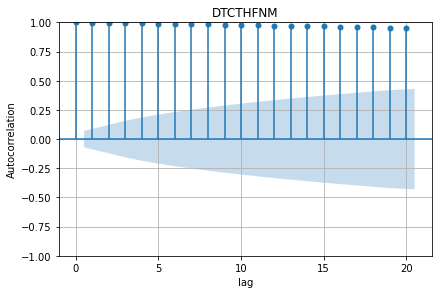

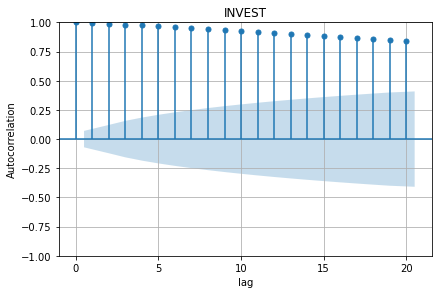

In [94]:
#autocorrelation_plot(group_5["TOTRESNS"])
for c in group_5.columns:
    autocorrelation(c, group_5)

GROUP 6 - Interest and exchange rates

mean         25%         50%         75%         std   
FEDFUNDS         4.763458    1.920000    4.630000    6.535000    3.661032  \
CP3Mx            4.892481    2.317500    4.860000    6.587500    3.450380   
TB3MS            4.343458    1.925000    4.430000    5.960000    3.156883   
TB6MS            4.483639    2.035000    4.600000    6.140000    3.146788   
GS1              4.839510    2.330000    4.880000    6.645000    3.358980   
GS5              5.484077    3.295000    5.190000    7.405000    3.125415   
GS10             5.799432    3.845000    5.390000    7.525000    2.938203   
AAA              6.799355    4.450000    6.630000    8.445000    2.708299   
BAA              7.800284    5.230000    7.540000    9.355000    2.938011   
COMPAPFFx        0.124225   -0.010000    0.100000    0.320000    0.431237   
TB3SMFFM        -0.418335   -0.600000   -0.190000   -0.040000    0.700555   
TB6SMFFM        -0.278155   -0.500000   -0.050000    0.090000    0.757986   
T1YFFM           0.077716   -0.100000    0.140000    0.450000    0.760551   
T5YFFM           0.722245    0.125000    0.870000    1.580000    1.321356   
T10YFFM          1.037613    0.205000    1.190000    2.170000    1.587765   
AAAFFM           2.037548    0.980000    2.170000    3.360000    1.891957   
BAAFFM           3.038490    1.820000    3.110000    4.480000    1.990394   
TWEXAFEGSMTHx  111.350176  102.118274  110.052734  118.966597   16.350552   
EXSZUSx          2.112422    1.166600    1.537400    2.730100    1.248778   
EXJPUSx        194.459250  110.000450  133.766100  291.544400  102.271434   
EXUSUKx          1.884959    1.527650    1.690800    2.345750    0.506989   
EXCAUSx          1.199341    1.072800    1.179700    1.322750    0.211695   

                  min         max  
FEDFUNDS       0.0500   19.100000  
CP3Mx          0.0900   18.070000  
TB3MS          0.0100   16.300000  
TB6MS          0.0400   15.520000  
GS1            0.0500   16.720000  
GS5            0.2700   15.930000  
GS10           0.6200   15.320000  
AAA            2.0000   15.490000  
BAA            2.0000   17.180000  
COMPAPFFx     -2.7800    2.220000  
TB3SMFFM      -5.3700    1.070000  
TB6SMFFM      -5.0100    1.280000  
T1YFFM        -5.0000    1.750000  
T5YFFM        -6.3100    3.160000  
T10YFFM       -6.5100    3.850000  
AAAFFM        -6.2700    5.730000  
BAAFFM        -4.0500    8.820000  
TWEXAFEGSMTHx  5.0000  170.302034  
EXSZUSx        0.7800    5.000000  
EXJPUSx        5.0000  362.976400  
EXUSUKx        1.0931    5.000000  
EXCAUSx        0.9478    5.000000

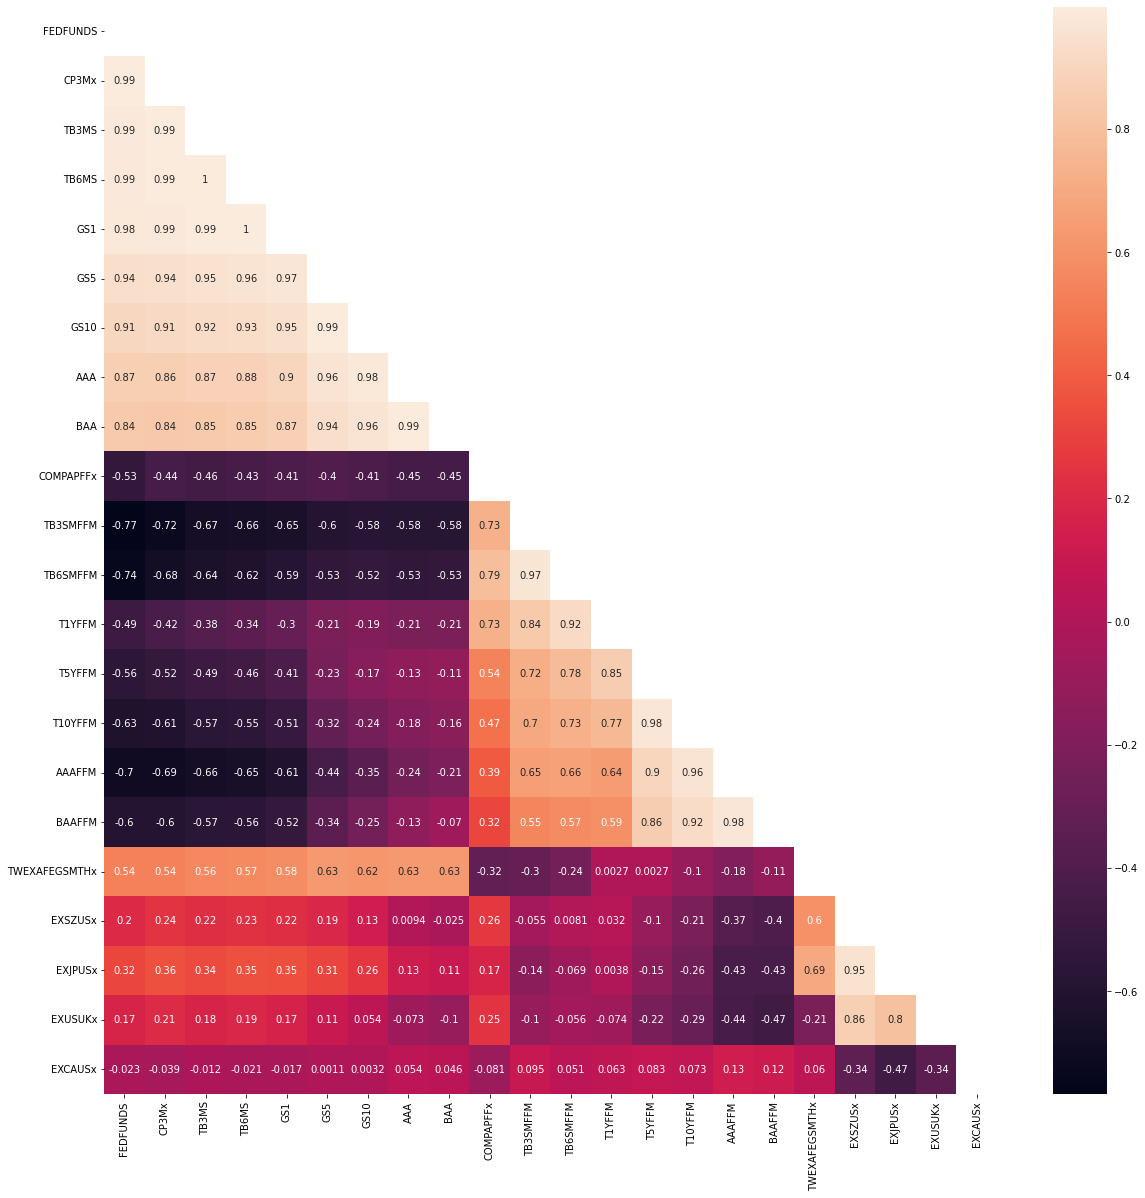

In [96]:
group_6 = df.iloc[:, group_6_id]
table(group_6)
heatmap(group_6)

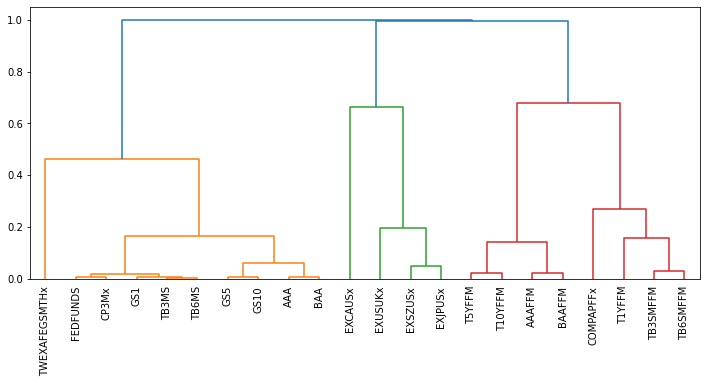

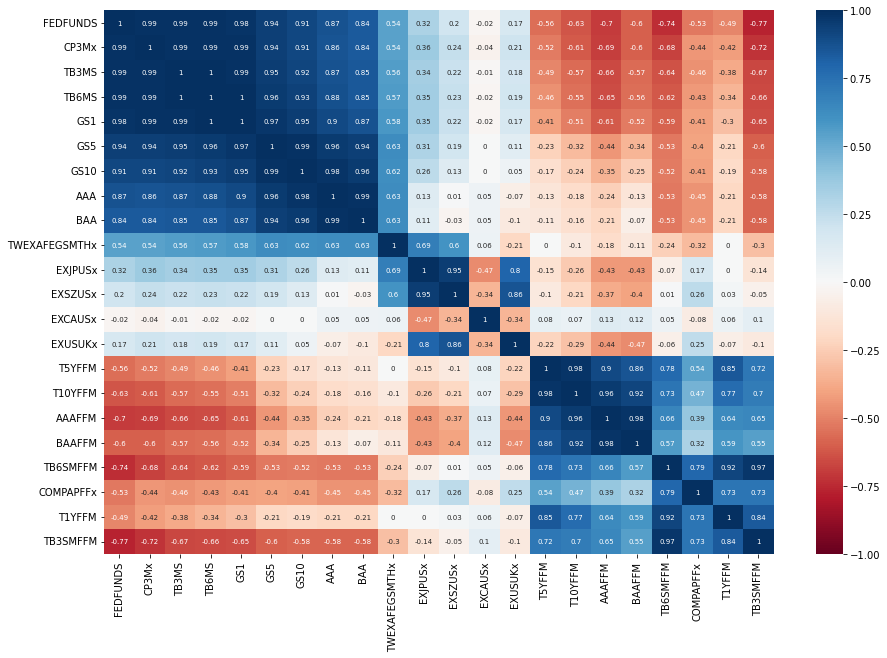

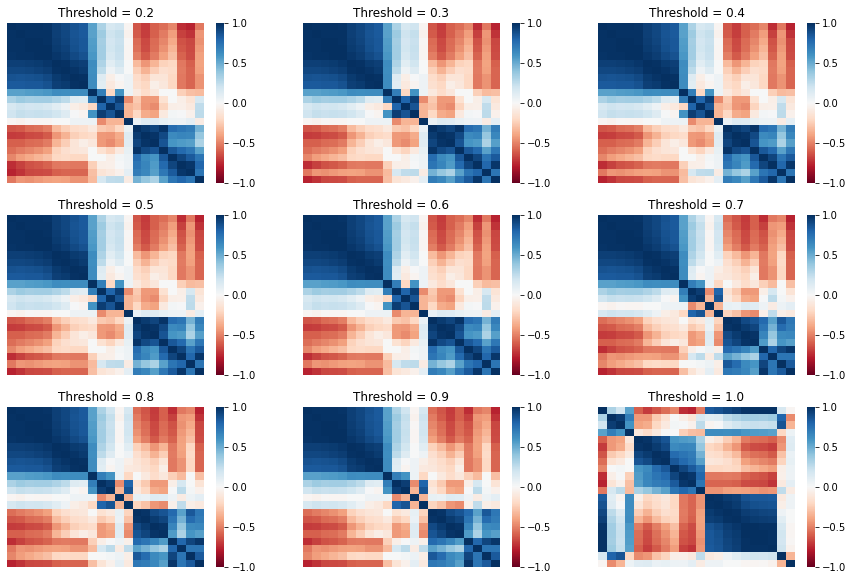

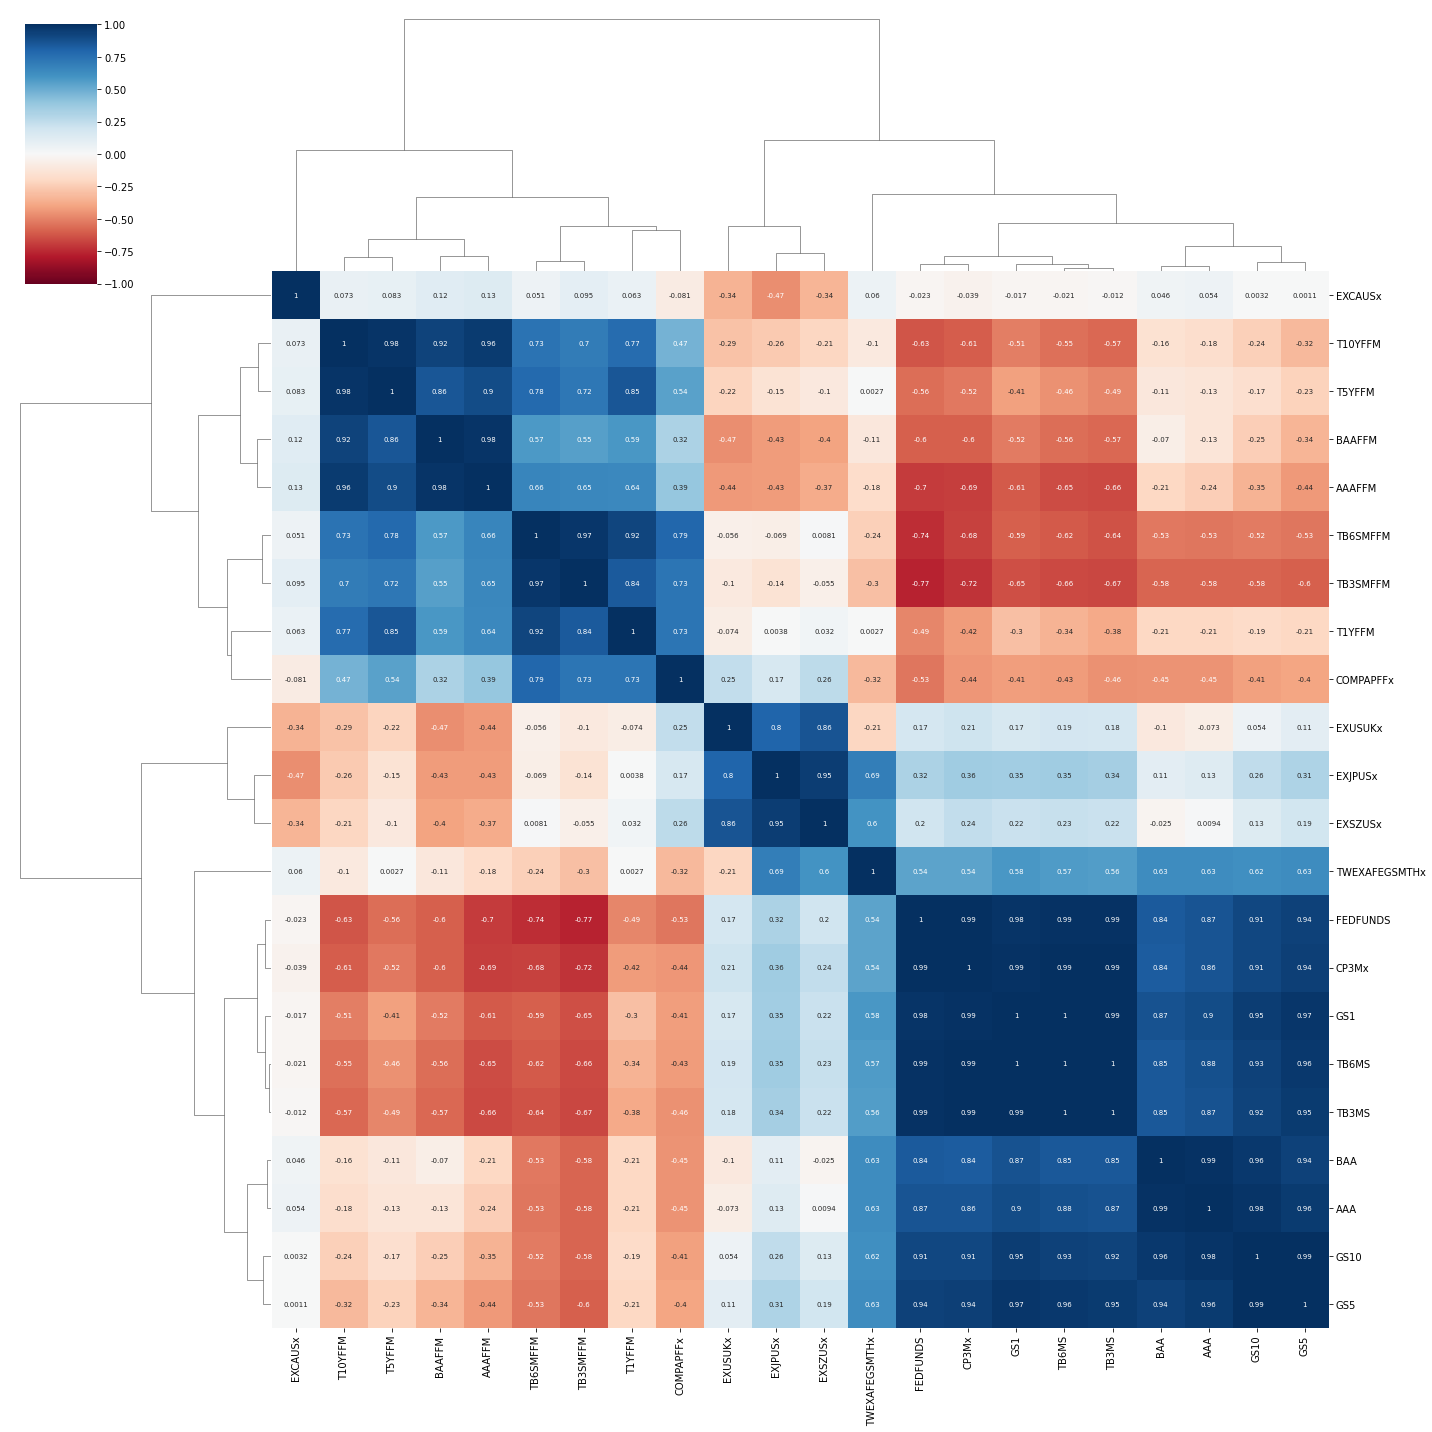

In [148]:



plt.figure(figsize=(12,5))
correlations = group_6.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=group_6.columns, orientation='top', 
           leaf_rotation=90);

# Clusterize the data
threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(group_6.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(group_6[i])
    else:
        df_to_append = pd.DataFrame(group_6[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.figure(figsize=(15,10))



for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(group_6.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(group_6[i])
        else:
            df_to_append = pd.DataFrame(group_6[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(20,20));

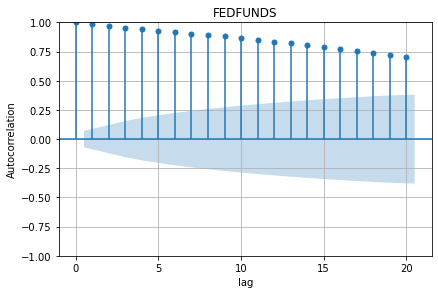

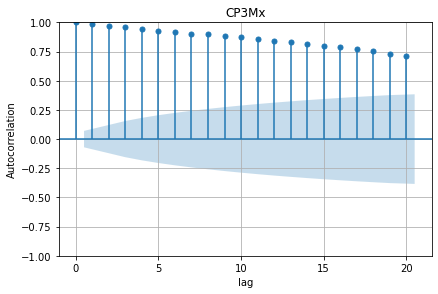

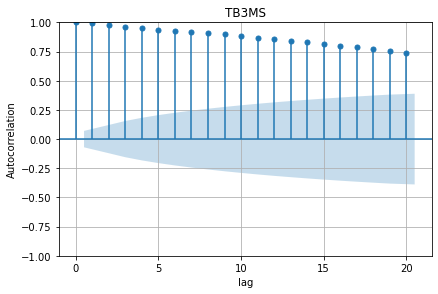

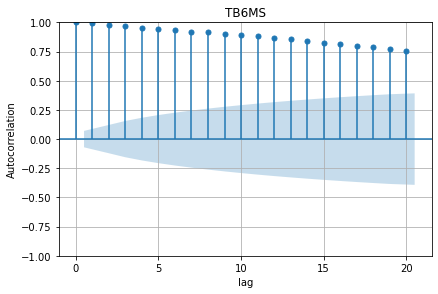

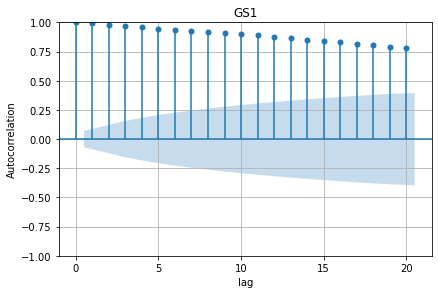

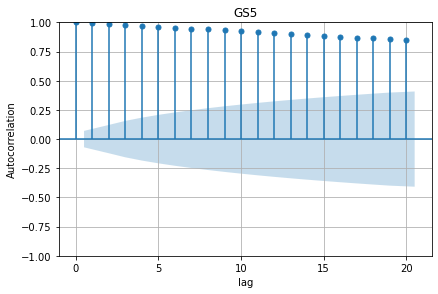

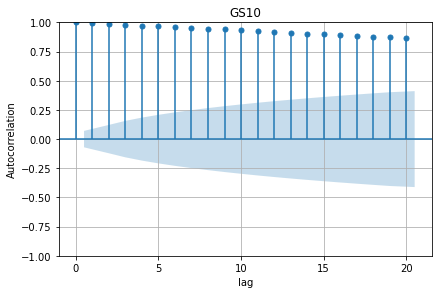

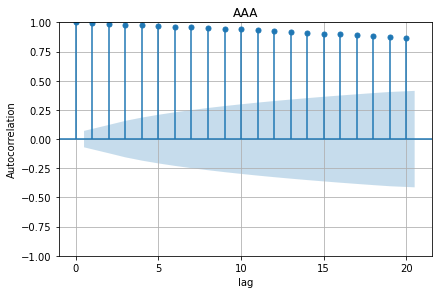

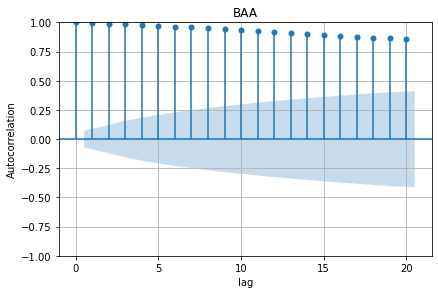

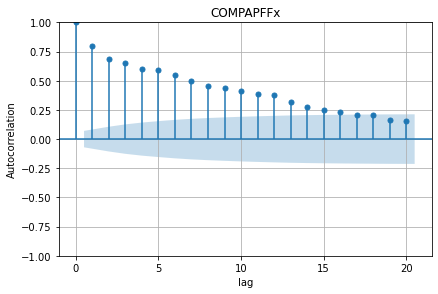

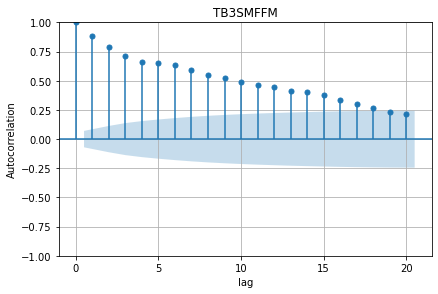

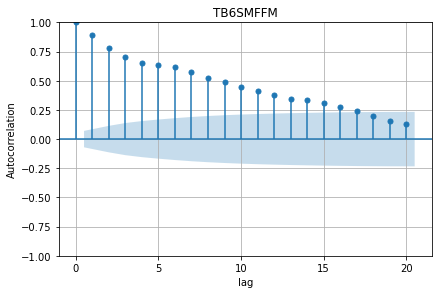

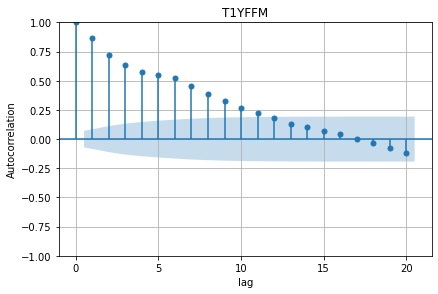

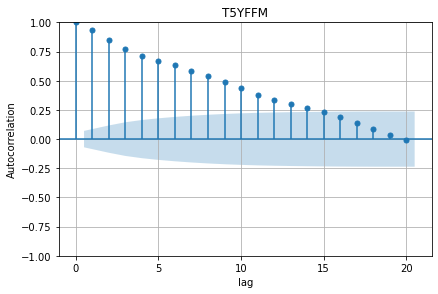

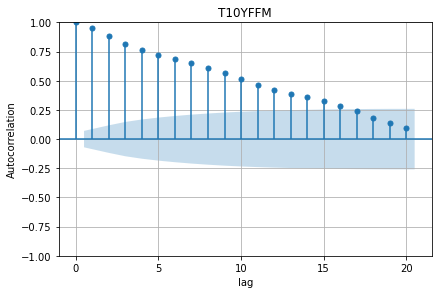

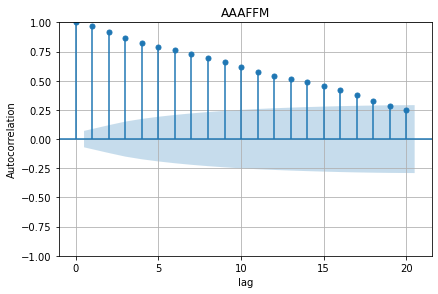

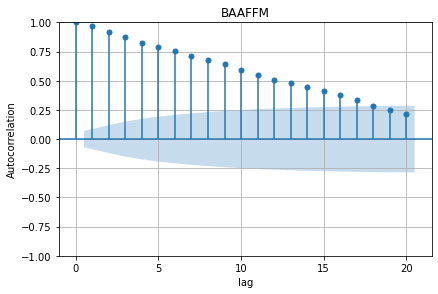

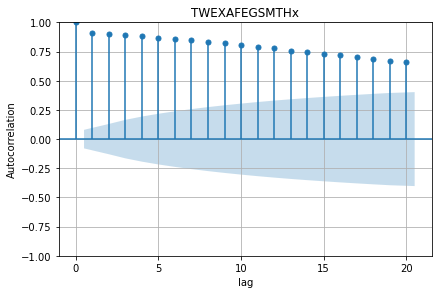

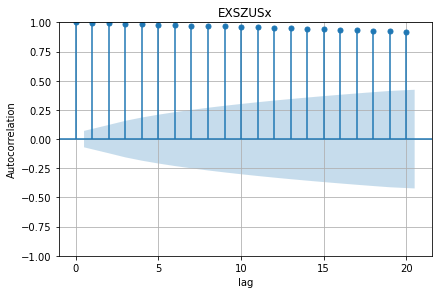

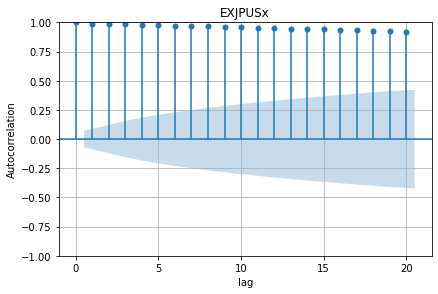

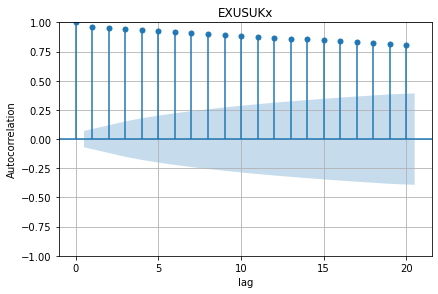

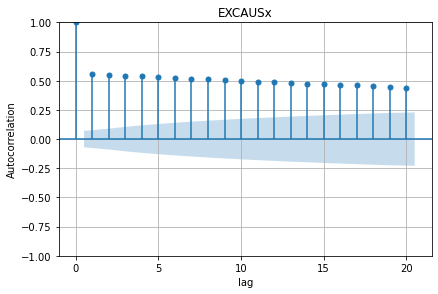

In [98]:
for c in group_6.columns:
    autocorrelation(c, group_6)

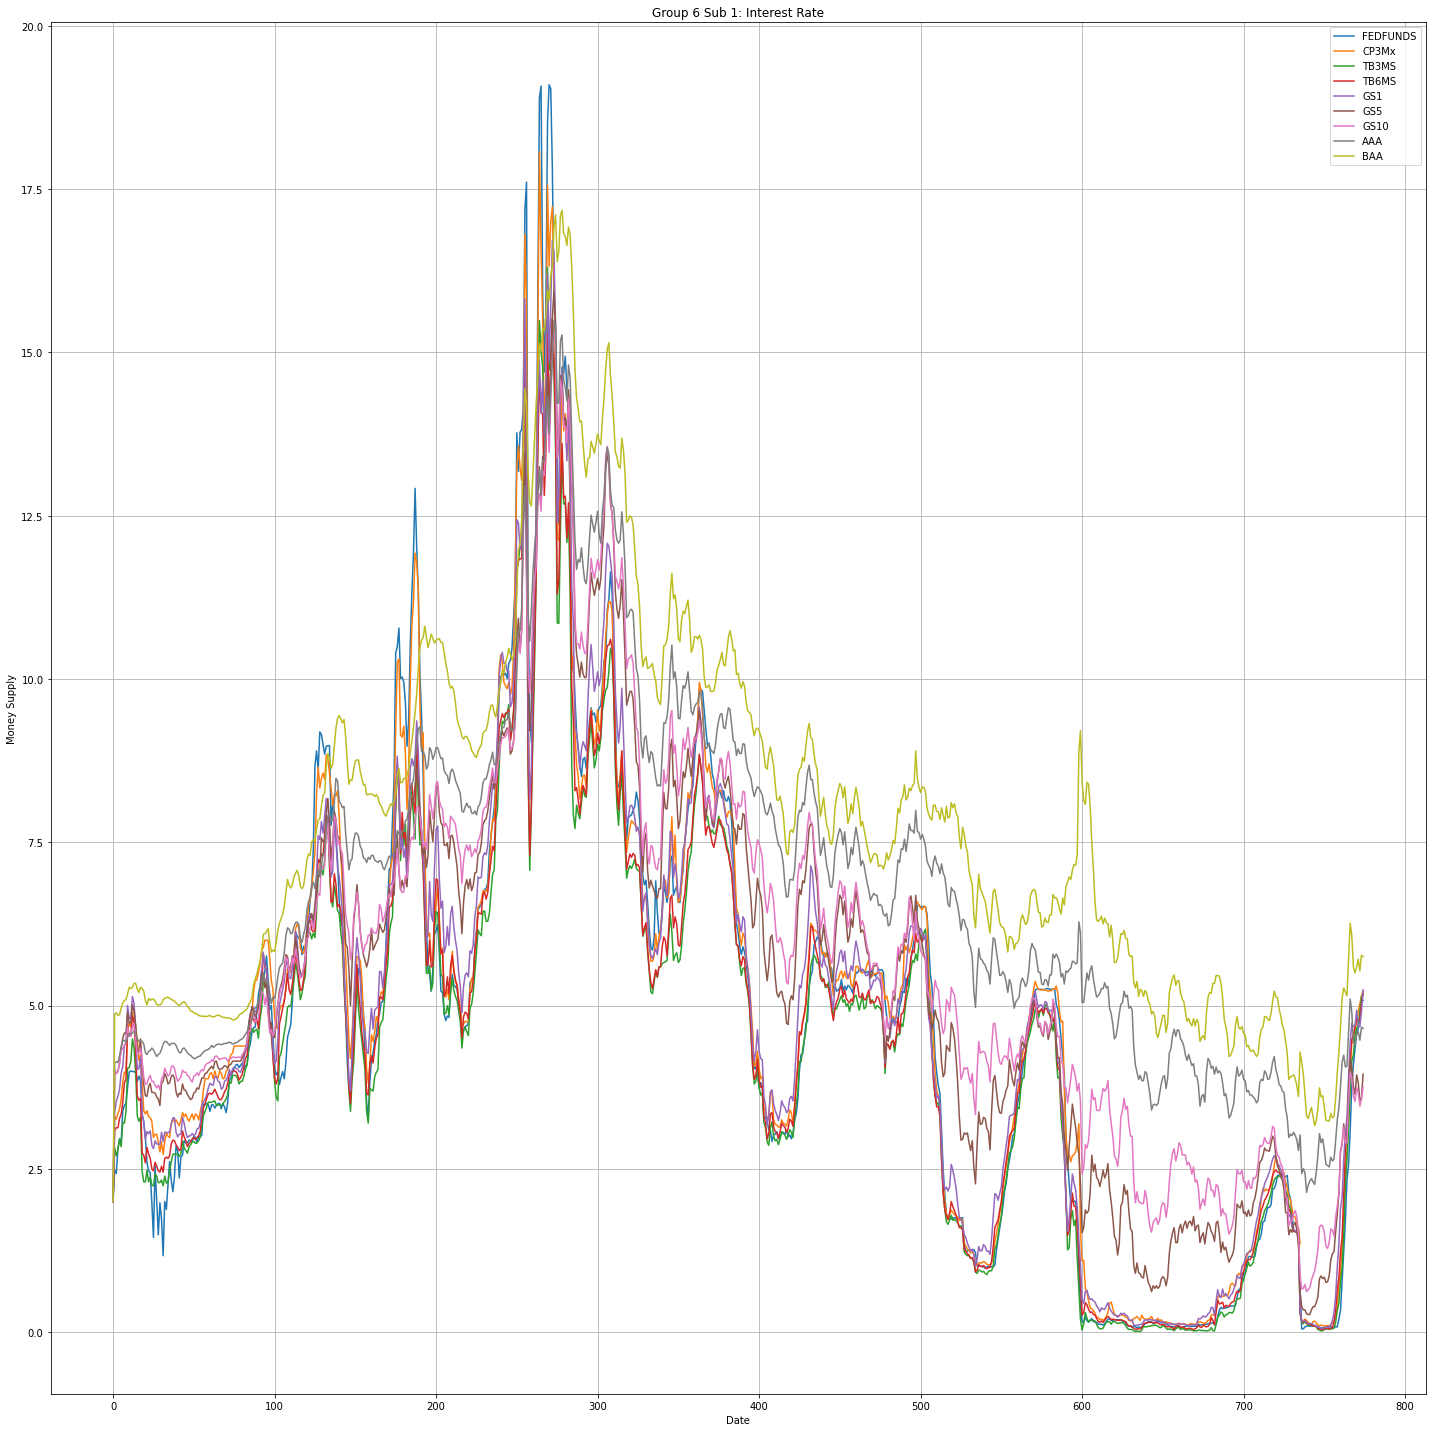

<Figure size 432x288 with 0 Axes>

In [79]:
group_6 = df.iloc[:, group_6_id]

group6sub1 = group_6.iloc[:, [0,1,2,3,4,5,6,7,8]]


#Plotting 


plt.figure(figsize=(20, 20))
plot_dataframe(
    group6sub1,
    'Group 6 Sub 1: Interest Rate',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()


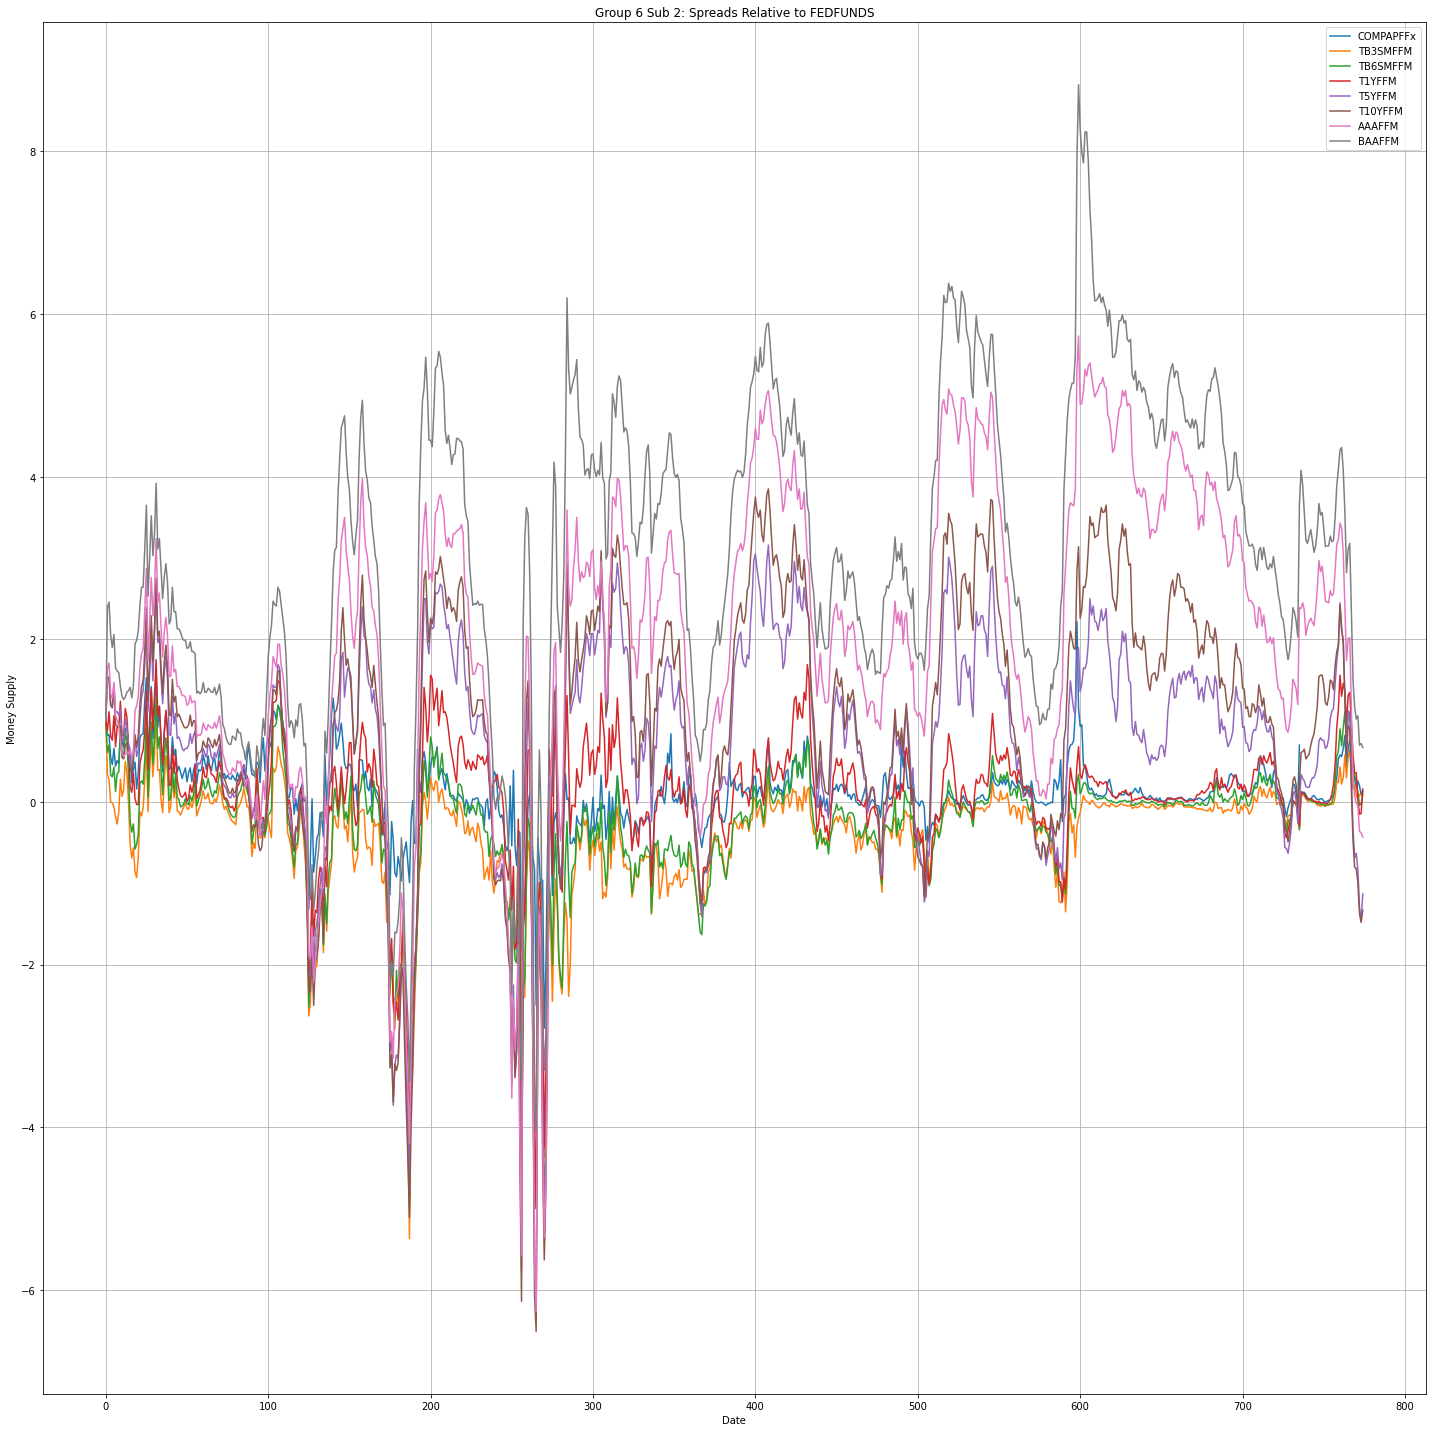

<Figure size 432x288 with 0 Axes>

In [80]:
group6sub2 = group_6.iloc[:, [9,10,11,12,13,14,15,16]]


#Plotting 


plt.figure(figsize=(20, 20))
plot_dataframe(
    group6sub2,
    'Group 6 Sub 2: Spreads Relative to FEDFUNDS',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()

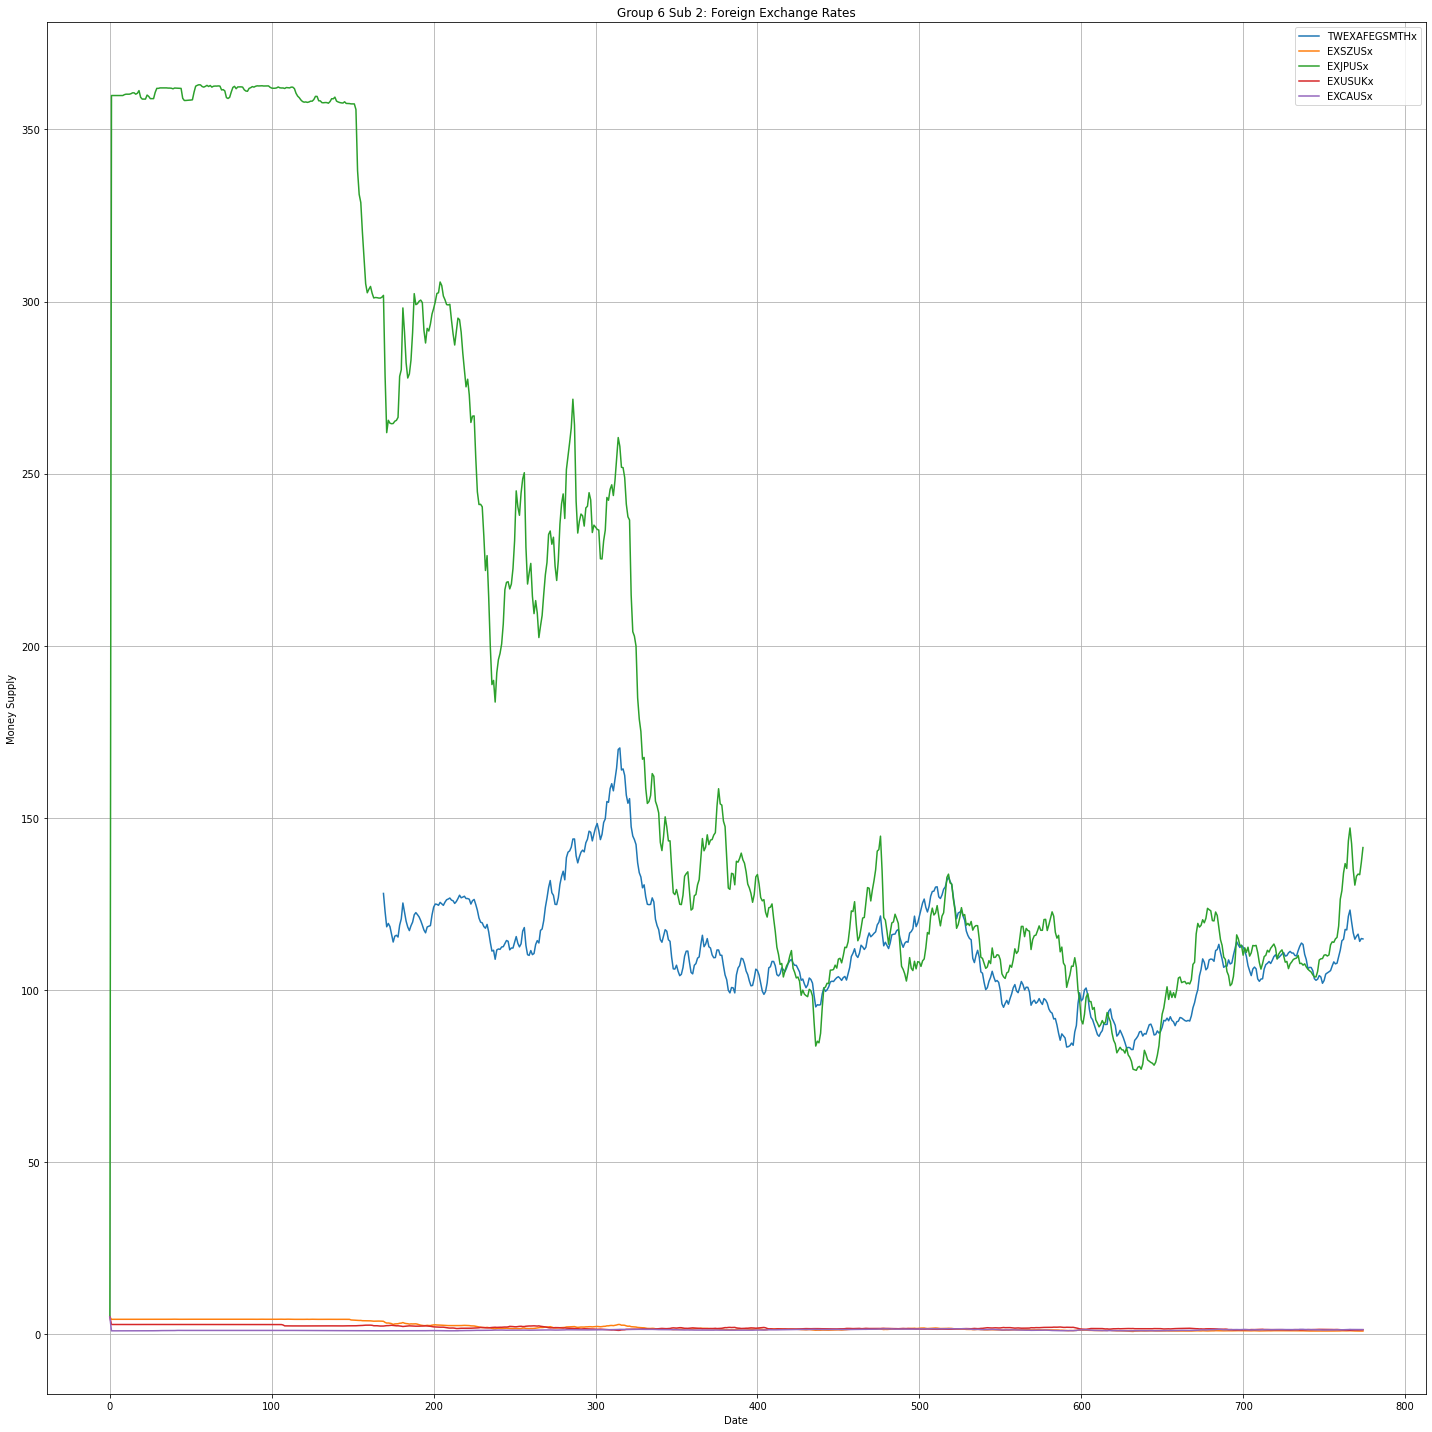

<Figure size 432x288 with 0 Axes>

In [81]:
group6sub3 = group_6.iloc[:, [17,18,19,20,21]]


#Plotting 


plt.figure(figsize=(20, 20))
plot_dataframe(
    group6sub3,
    'Group 6 Sub 2: Foreign Exchange Rates',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()

GROUP 7 - Prices

mean      25%      50%       75%         std   min   
OILPRICEx         32.063732  11.1600   21.350   47.1200   29.224055  2.92  \
PPICMM           124.163452  70.7500  111.700  174.6000   69.362530  6.00   
CPIAUCSL         134.715899  52.4500  134.800  206.3295   80.415410  6.00   
CPIAPPSL         100.646065  71.9000  118.600  126.0430   31.254725  6.00   
CPITRNSL         120.925045  48.1500  123.900  181.2705   68.049133  6.00   
CPIMEDSL         208.402912  45.5500  173.200  347.9055  167.325231  6.00   
CUSR0000SAC      115.570003  56.8000  126.300  166.1700   57.040841  6.00   
CUSR0000SAD       91.586995  55.5500  107.100  114.9500   32.745415  6.00   
CUSR0000SAS      153.349857  46.7000  144.700  245.6055  104.718525  6.00   
CPIULFSL         134.530653  51.0500  134.700  207.1780   80.295707  6.00   
CUSR0000SA0L2    129.853243  54.6000  132.200  195.6960   73.673133  6.00   
CUSR0000SA0L5    131.034792  52.9000  132.600  199.1575   76.237173  6.00   
PCEPI             61.868075  27.7200   64.760   91.2065   33.079343  6.00   
DDURRG3M086SBEA   98.417151  75.5215  100.310  121.5600   27.004745  6.00   
DNDGRG3M086SBEA   60.157643  31.5120   64.962   86.4080   29.498072  6.00   
DSERRG3M086SBEA   58.195919  20.9120   56.218   90.2890   36.724376  6.00   

                     max  
OILPRICEx        133.930  
PPICMM           322.100  
CPIAUCSL         303.841  
CPIAPPSL         135.100  
CPITRNSL         278.378  
CPIMEDSL         555.962  
CUSR0000SAC      225.277  
CUSR0000SAD      129.700  
CUSR0000SAS      383.072  
CPIULFSL         301.025  
CUSR0000SA0L2    277.519  
CUSR0000SA0L5    292.077  
PCEPI            127.178  
DDURRG3M086SBEA  140.457  
DNDGRG3M086SBEA  115.940  
DSERRG3M086SBEA  136.989

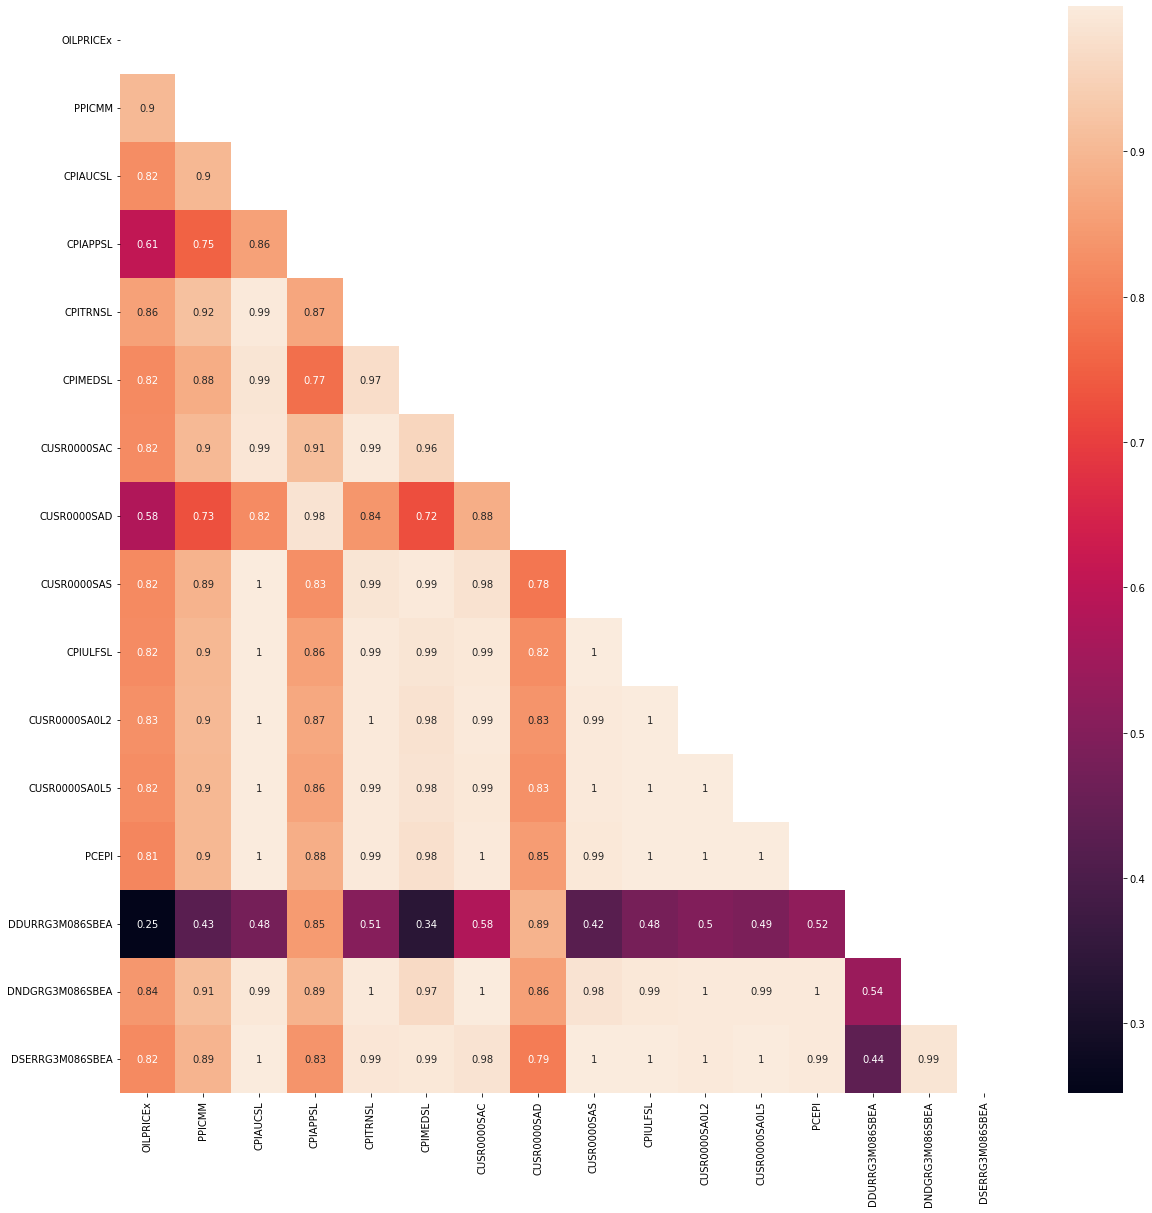

In [94]:
group_7 = df.iloc[:, group_7_id]
table(group_7)
heatmap(group_7)

GROUP 8 - Stock Market

mean         25%         50%          75%          std   
S&P 500         858.924206  100.400000  372.280000  1282.140000  1032.376682  \
S&P: indust    1102.168439  110.600000  441.870000  1565.745000  1422.233565   
S&P div yield     2.865151    1.915254    2.901624     3.469687     1.127745   
S&P PE ratio     19.283044   14.792833   18.621723    22.188038     8.397968   

                    min          max  
S&P 500        5.000000  4674.770000  
S&P: indust    5.000000  6561.930000  
S&P div yield  1.108074     6.237048  
S&P PE ratio   5.000000    86.843117

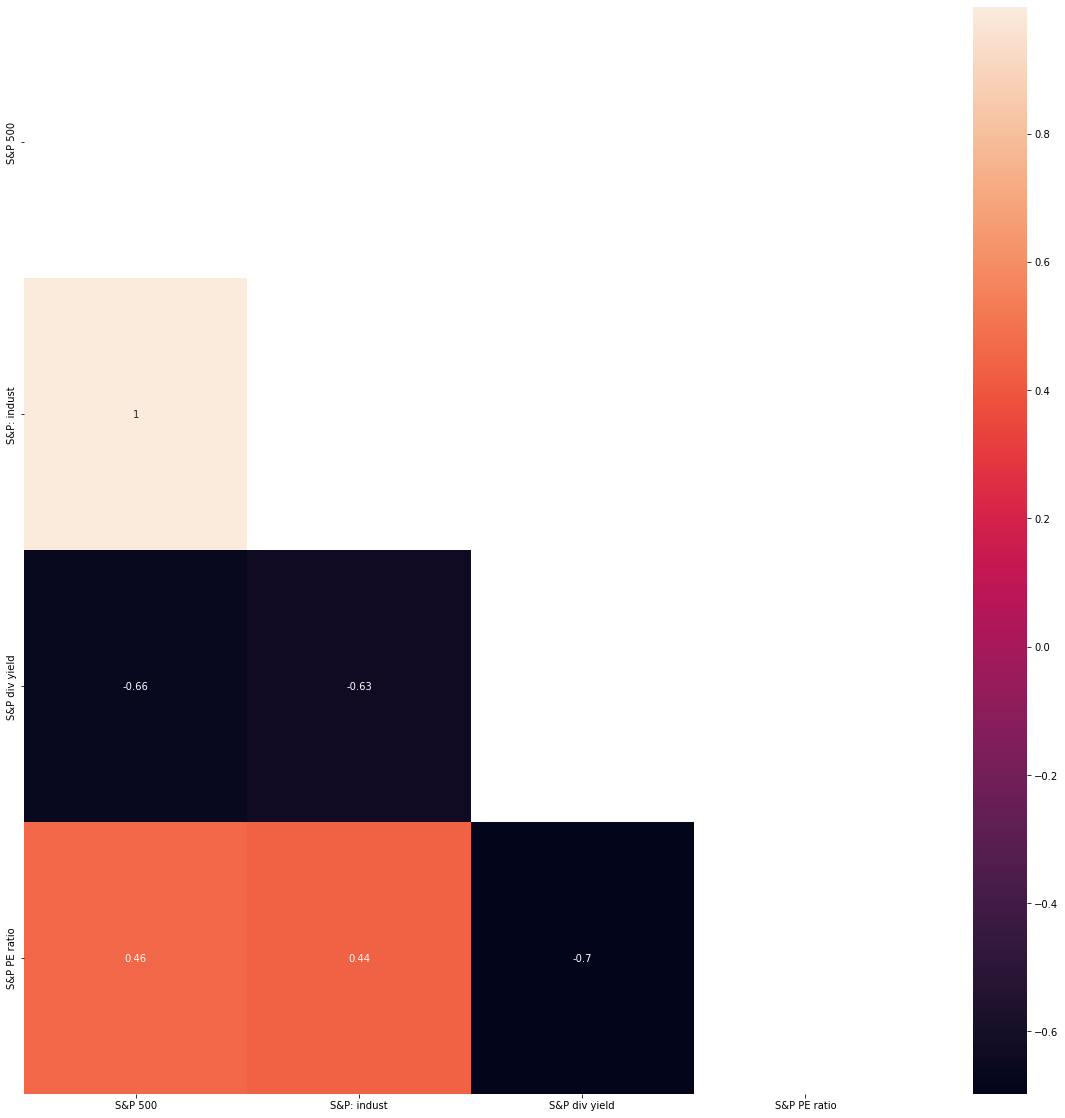

In [99]:
group_8 = df.iloc[:, group_8_id]
table(group_8)
heatmap(group_8)

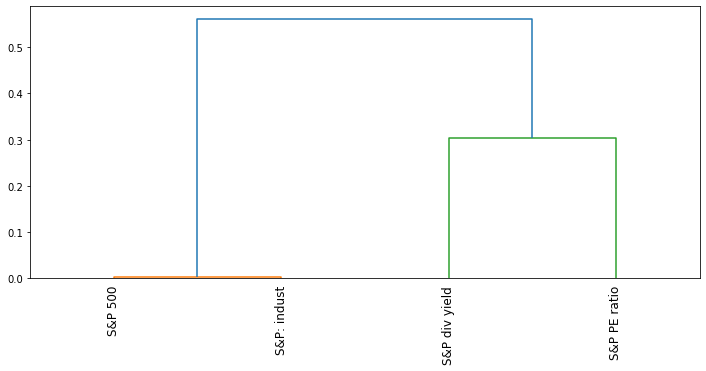

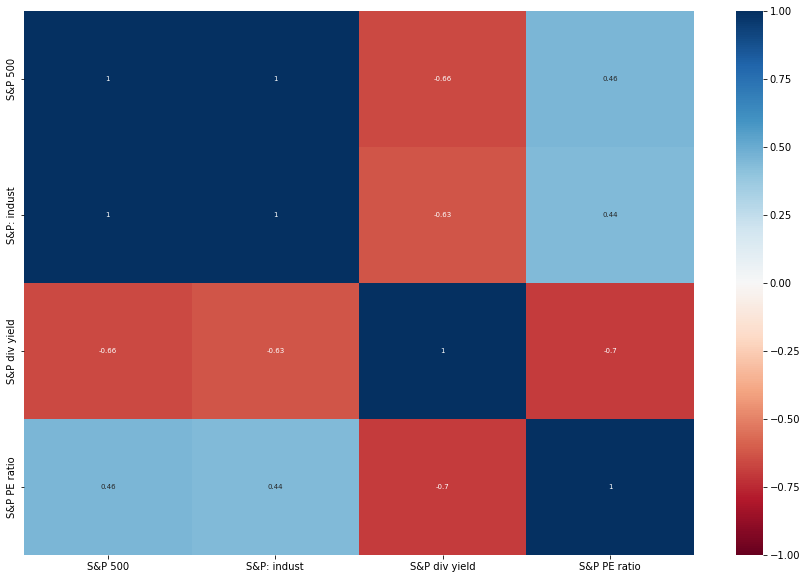

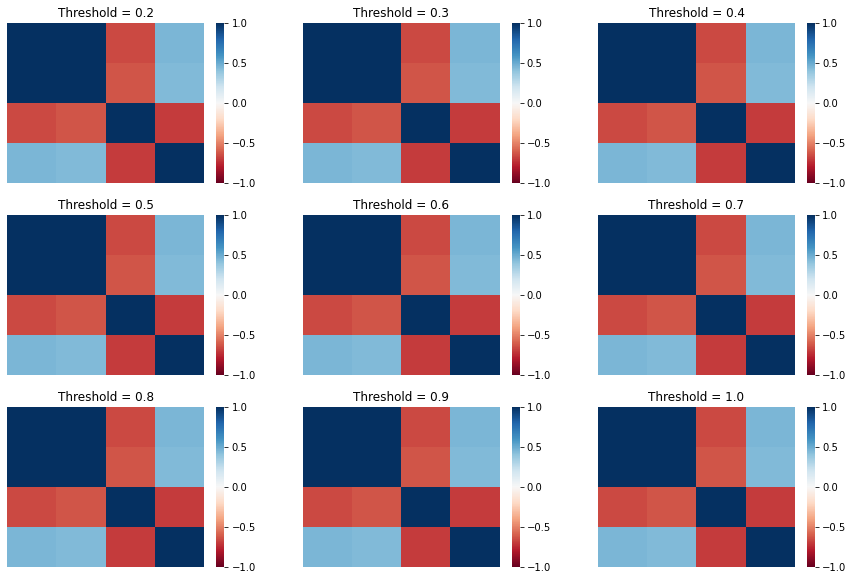

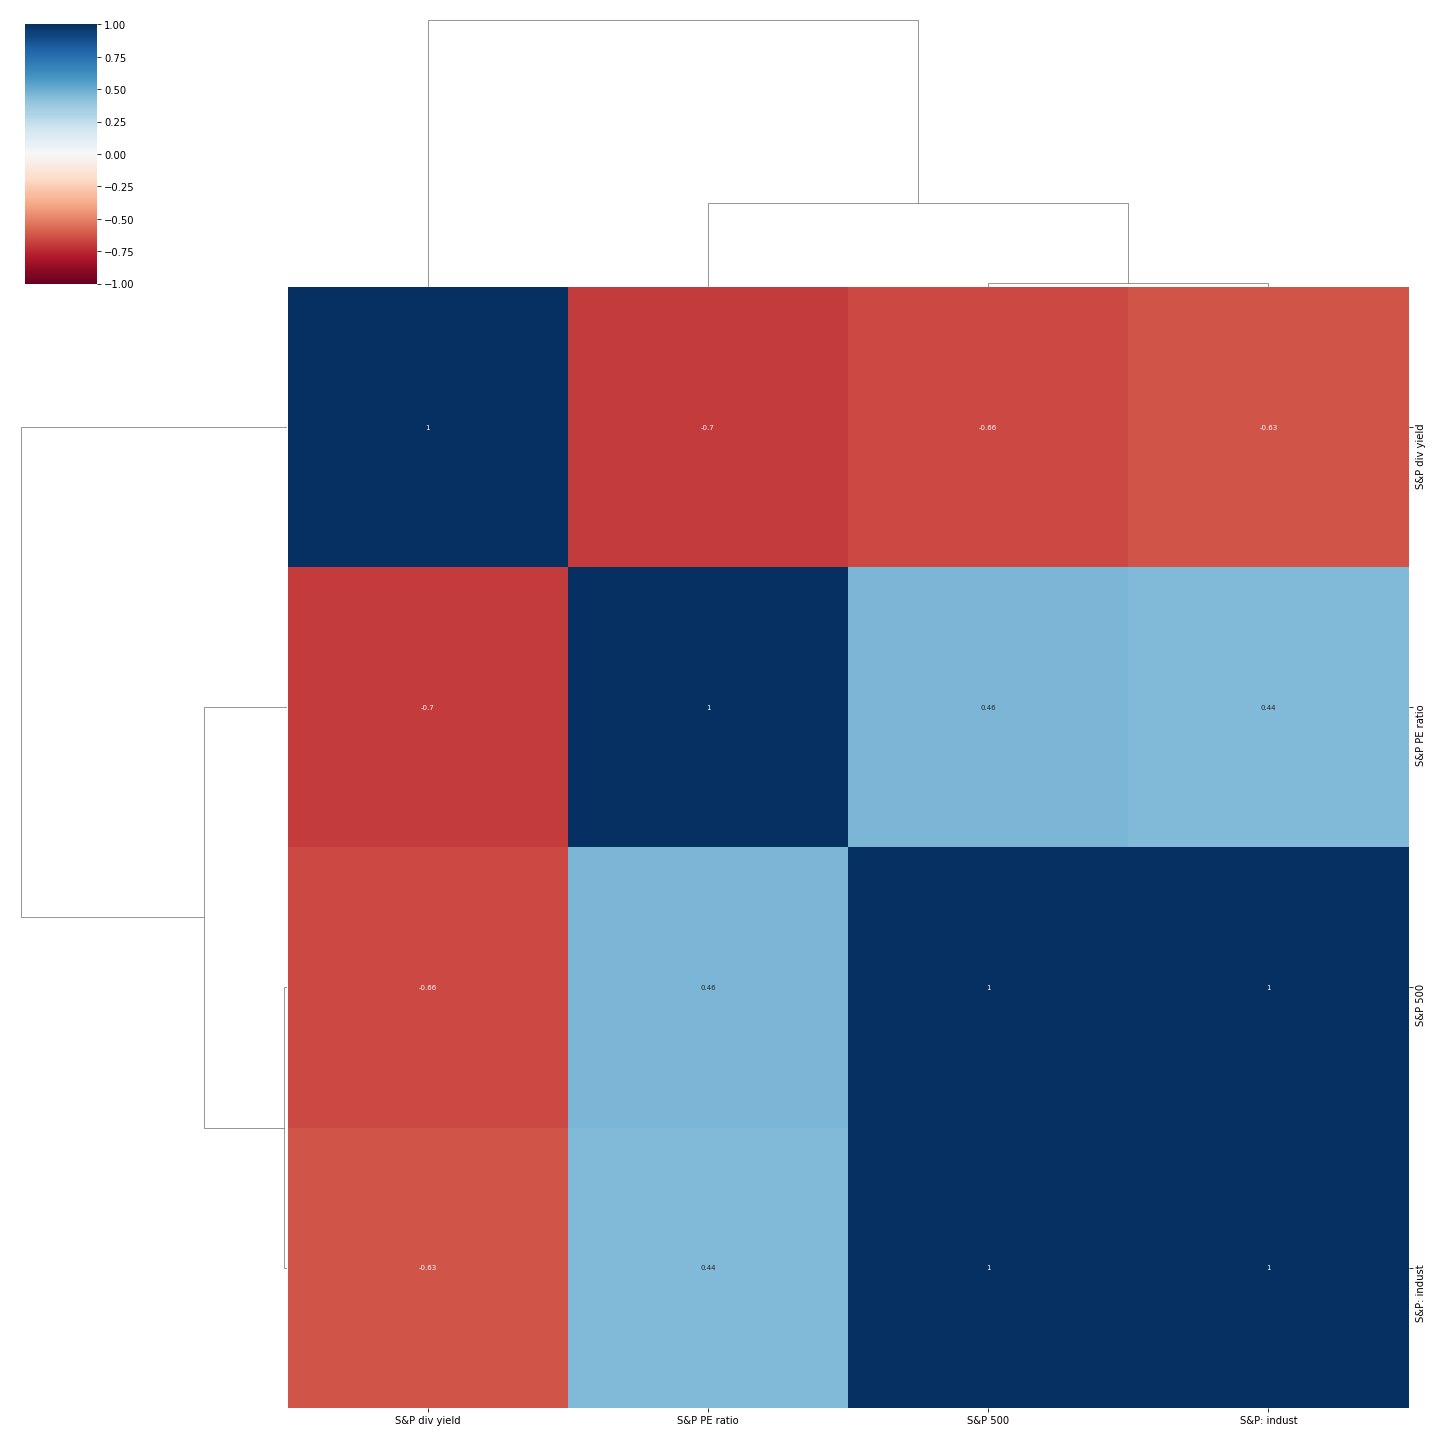

In [151]:



plt.figure(figsize=(12,5))
correlations = group_8.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=group_8.columns, orientation='top', 
           leaf_rotation=90);

# Clusterize the data
threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(group_8.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(group_8[i])
    else:
        df_to_append = pd.DataFrame(group_8[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.figure(figsize=(15,10))



for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(group_8.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(group_8[i])
        else:
            df_to_append = pd.DataFrame(group_8[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(20,20));

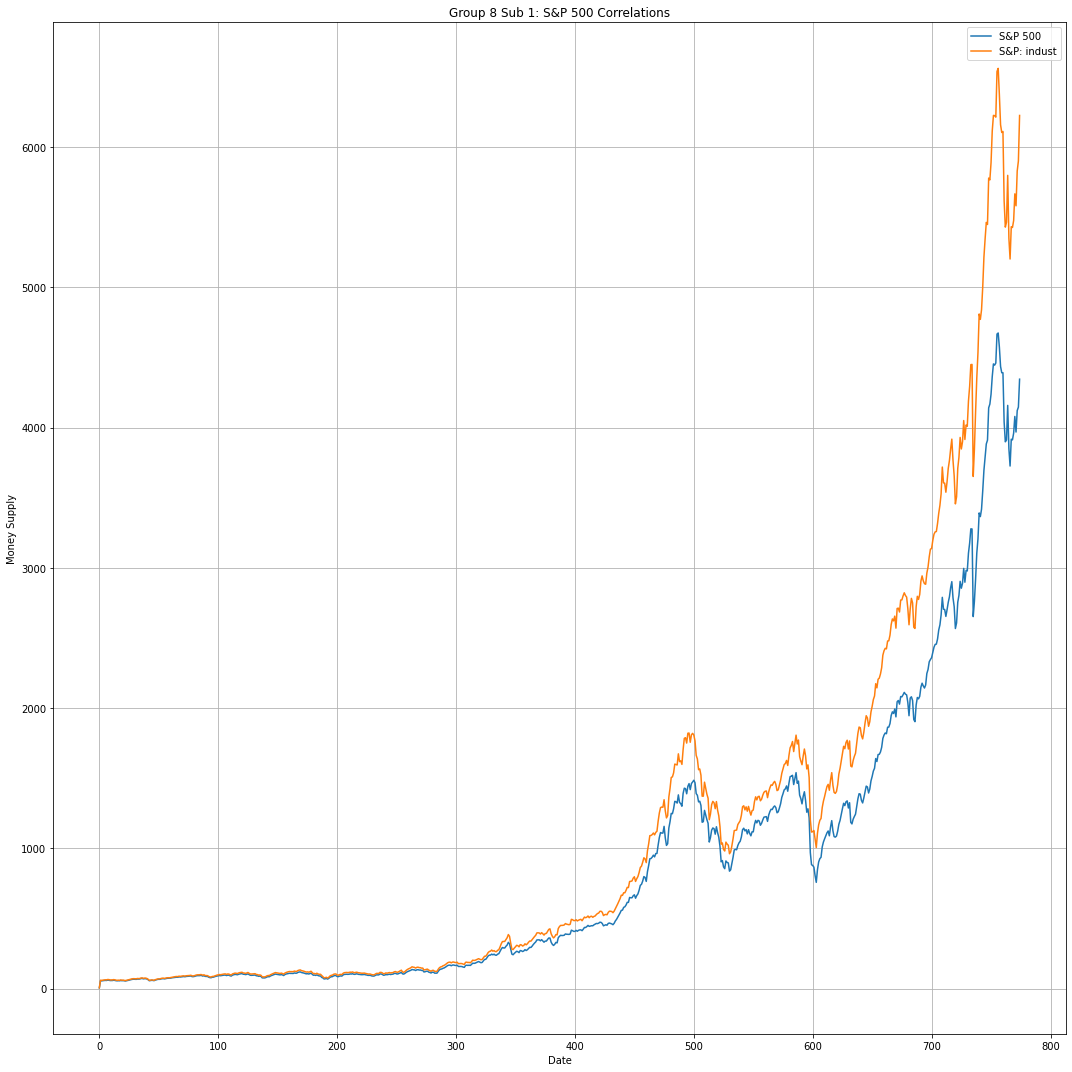

<Figure size 432x288 with 0 Axes>

In [89]:
group8sub1 = group_8.iloc[:, [0,1]]


#Plotting 


plt.figure(figsize=(15, 15))
plot_dataframe(
    group8sub1,
    'Group 8 Sub 1: S&P 500 Correlations',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()

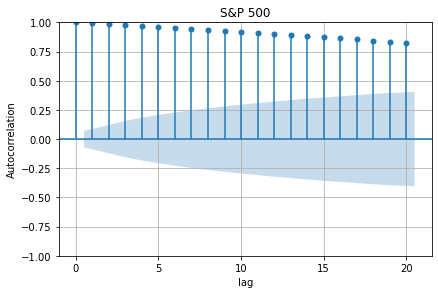

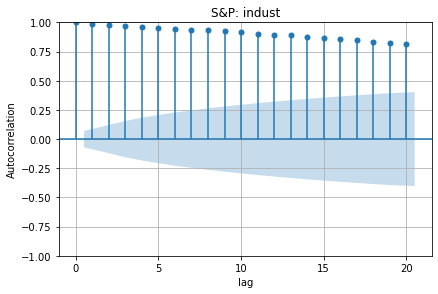

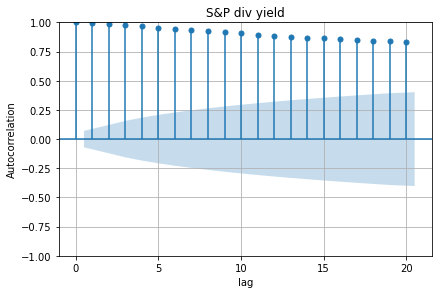

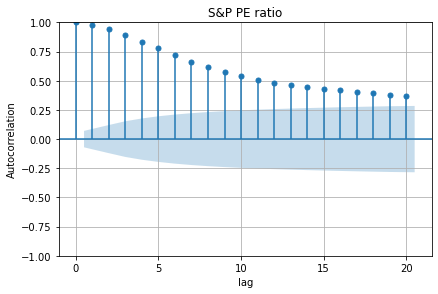

In [107]:
for c in group_8.columns:
    autocorrelation(c, group_8)

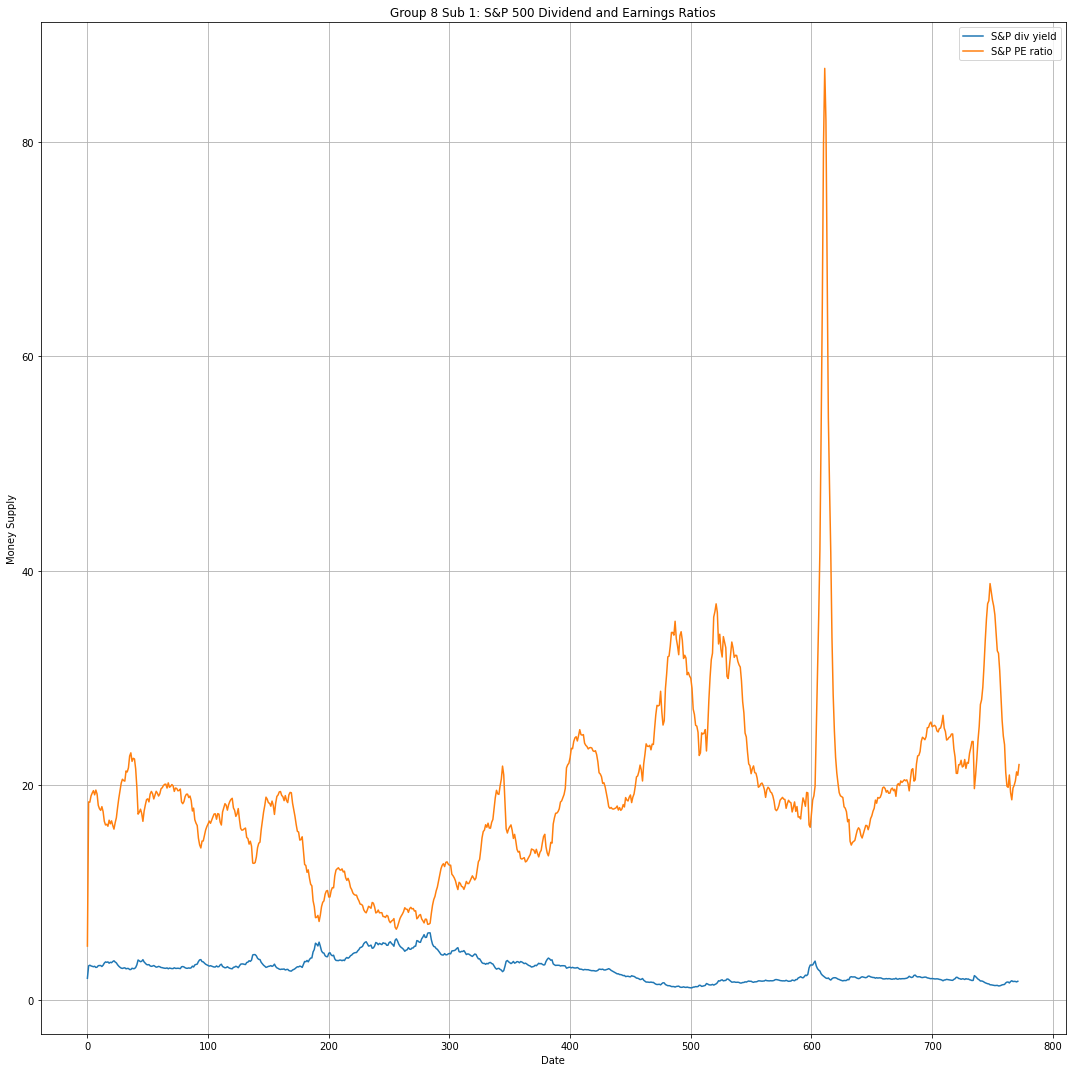

<Figure size 432x288 with 0 Axes>

In [90]:
group8sub2 = group_8.iloc[:, [2 ,3]]


#Plotting 


plt.figure(figsize=(15, 15))
plot_dataframe(
    group8sub2,
    'Group 8 Sub 1: S&P 500 Dividend and Earnings Ratios',
    'Date',
    'Money Supply'
)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Example: Create a lagged column for 'VariableA' with a lag of 1 quarter
df['VariableA_lag1'] = df['VariableA'].shift(1)
# Example: Calculate correlations between 'VariableA' and its lagged version
correlation_matrix = df[['VariableA', 'VariableA_lag1']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Lag')
plt.show()